<div style="background-color: #ecf0f1; padding: 20px; border-radius: 10px;">
  <h2 style="color: #1abc9c; font-family: Arial, sans-serif; text-align: center;">🚀 PROJECT GOALS AND OBJECTIVES</h2>

  <h3 style="color: #e74c3c; font-family: Arial, sans-serif;">🎯 PROJECT GOAL</h3>
  <p style="color: #2c3e50; font-family: Arial, sans-serif; line-height: 1.6;">
    Development of skills for building and improving neural network models using the sequential and functional TensorFlow API.
  </p>

  <h3 style="color: #e74c3c; font-family: Arial, sans-serif;">📌 PROJECT OBJECTIVES</h3>
  <ul style="color: #2c3e50; font-family: Arial, sans-serif; line-height: 1.6;">
    <li>📊 Data preparation</li>
    <li>🤖 Training a basic simple model using the sequential TensorFlow API and improving it using various methods.</li>
    <li>⚡ Training the basic complex model using the TensorFlow functional API and improving it using various methods.</li>
    <li>🧠 Training an ensemble of models</li>
  </ul>

  <h3 style="color: #e67e22; font-family: Arial, sans-serif;">📂 DATASET - Household Electric Power Consumption</h3>

  <h3 style="color: #f39c12; font-family: Arial, sans-serif;">📌 ATTRIBUTE INFORMATION:</h3>
  <div style="background-color: #ffffff; padding: 15px; border-radius: 10px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
    <ul style="color: #34495e; font-family: Arial, sans-serif; line-height: 1.6;">
      <li><strong>📅 Date:</strong> Format <code>dd/mm/yyyy</code></li>
      <li><strong>⏰ Time:</strong> Format <code>hh:mm:ss</code></li>
      <li><strong>⚡ Global Active Power:</strong> Household global minute-averaged active power (in kilowatt)</li>
      <li><strong>⚙️ Global Reactive Power:</strong> Household global minute-averaged reactive power (in kilowatt)</li>
      <li><strong>🔌 Voltage:</strong> Minute-averaged voltage (in volt)</li>
      <li><strong>⚡ Global Intensity:</strong> Household global minute-averaged current intensity (in ampere)</li>
      <li><strong>🍽️ Sub Metering 1:</strong> Energy usage in the kitchen (dishwasher, oven, microwave).</li>
      <li><strong>🧺 Sub Metering 2:</strong> Energy usage in the laundry room (washing machine, tumble-drier, refrigerator, light).</li>
      <li><strong>❄️ Sub Metering 3:</strong> Energy usage for an electric water heater and air-conditioner.</li>
    </ul>
  </div>
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

from functools import partial

In [7]:
data_path = (r'c:\Users\Umair\Downloads\Compressed\household_power_consumption.txt')

data = pd.read_csv(data_path, sep=';',
                   parse_dates={'data': ['Date', 'Time']},
                   infer_datetime_format=True,
                   na_values=['nan', '?'],
                   index_col='data')

C:\Users\Umair\AppData\Local\Temp\ipykernel_1280\2080487694.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(data_path, sep=';',
C:\Users\Umair\AppData\Local\Temp\ipykernel_1280\2080487694.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(data_path, sep=';',
C:\Users\Umair\AppData\Local\Temp\ipykernel_1280\2080487694.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(data_path, sep=';',


In [8]:
data_head = data.head()
data_head

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
data,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [9]:
data_tail = data.tail()
data_tail

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
data,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [10]:
# DATA EXPLORATION
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [12]:
data.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [13]:
data_clear = data.dropna()

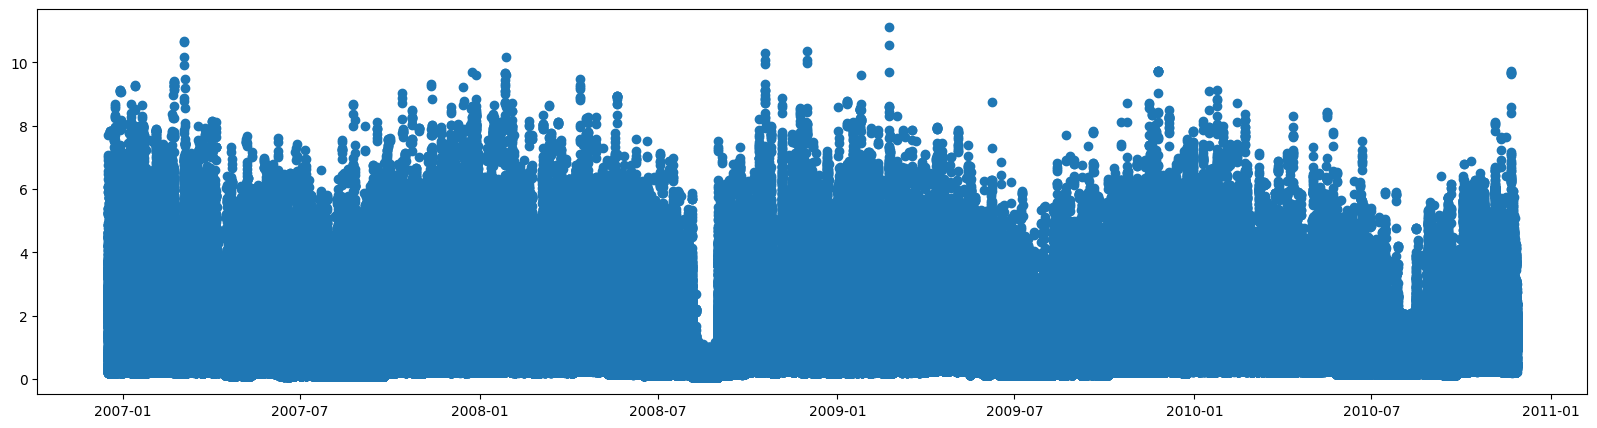

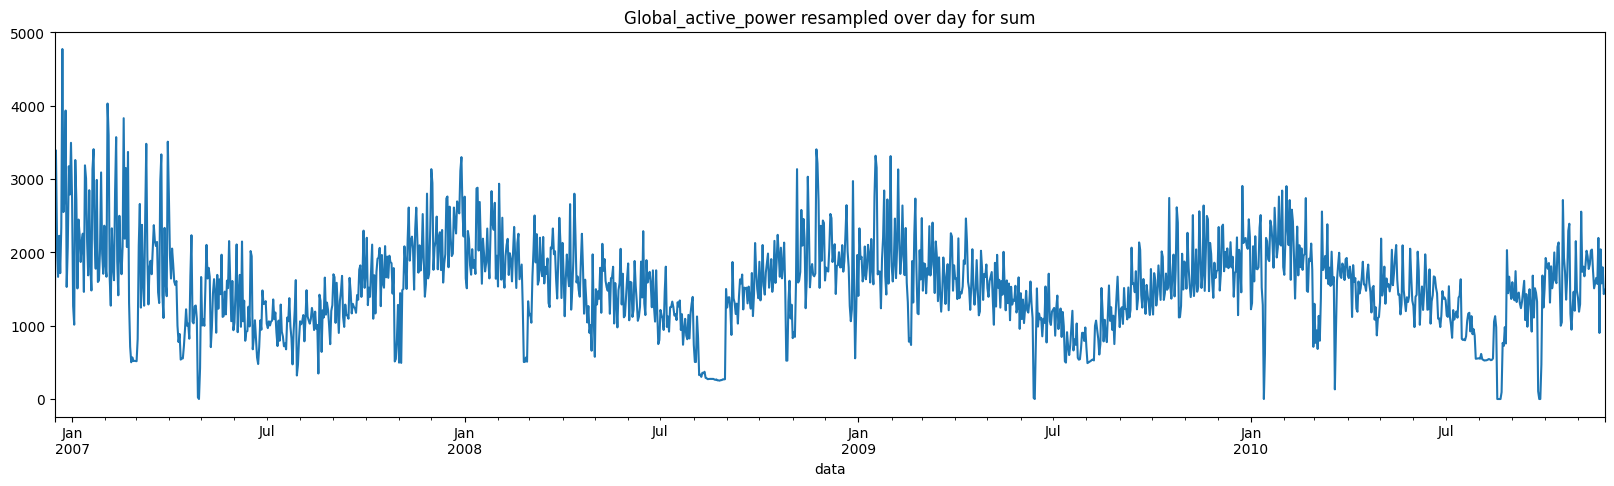

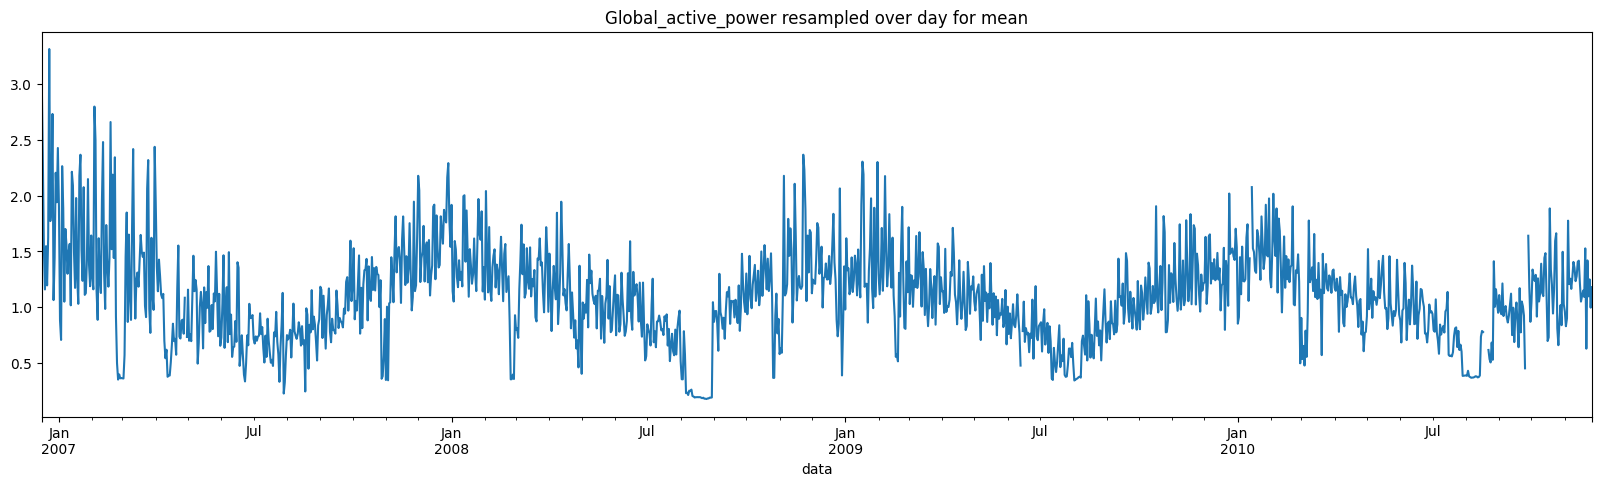

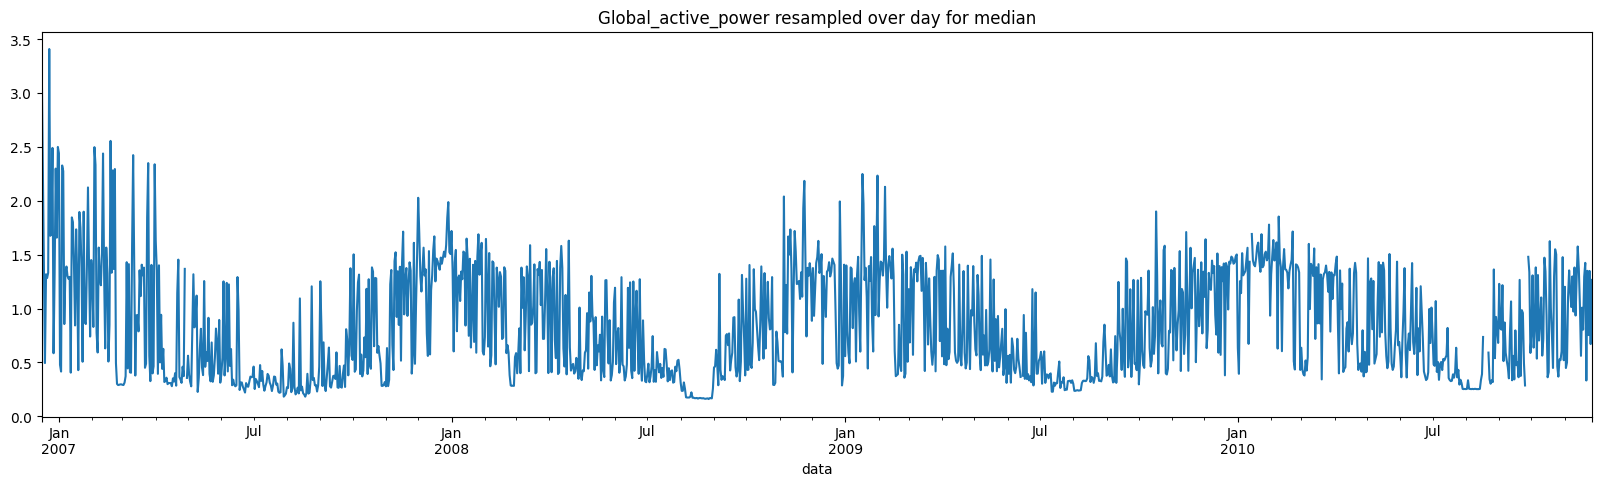

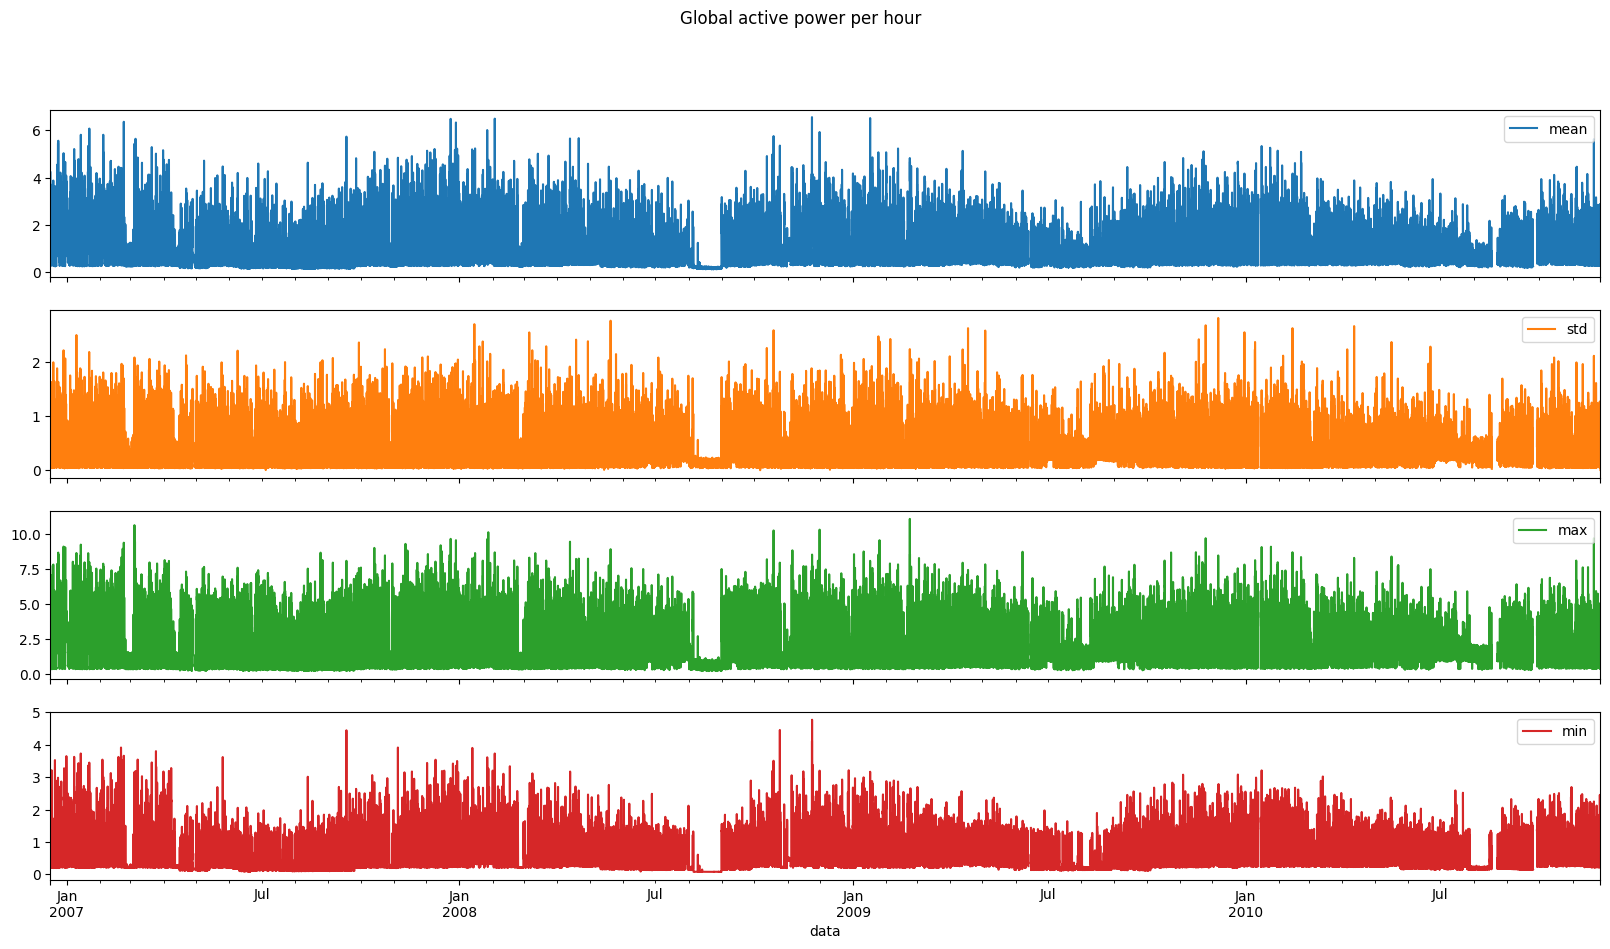

In [14]:
# VISUALIZATION

# Scatter plot of Global_active_power
plt.figure(figsize=(20, 5))
plt.scatter(data_clear.index, data_clear['Global_active_power'])
plt.show()

# Global_active_power resampled over day for sum
plt.figure(figsize=(20, 5))
data_clear.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum')
plt.show()

# Global_active_power resampled over day for mean
plt.figure(figsize=(20, 5))
data_clear.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean')
plt.show()

# Global_active_power resampled over day for median
plt.figure(figsize=(20, 5))
data_clear.Global_active_power.resample('D').median().plot(title='Global_active_power resampled over day for median')
plt.show()

# Global active power per hour
h = data_clear.Global_active_power.resample('h').agg(['mean', 'std', 'max', 'min'])
h.plot(subplots=True, figsize=(20, 10), title='Global active power per hour')
plt.show()

In [15]:
# DATA PREPARATION

# Resampling of data over 30 minutes
data_resample = data_clear.resample('30Min').mean()
data_resample.shape

# Splitting into target variable and feathers
X = data_resample.drop("Global_active_power", axis=1)
X = X.reset_index(drop=True)
X.head()

y = data_resample["Global_active_power"].reset_index(drop=True)
y.head()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Control missing values
X_train.isna().sum()

X_test.isna().sum()

y_train.isna().sum()

y_test.isna().sum()

# Drop missing values
X_train = X_train.dropna()

X_test = X_test.dropna()

y_train = y_train.dropna()

y_test = y_test.dropna()

(48423, 6)
(20754, 6)
(48423,)
(20754,)


In [16]:
# NORMALIZE DATA

# scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize X_train
X_train_norm = scaler.fit_transform(X_train)
print(X_train.shape)

# Normalize X_test
X_test_norm = scaler.fit_transform(X_test)
print(X_test.shape)

(47840, 6)
(20484, 6)


In [17]:
# Evaluation and visualization of model parameters


def learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(20, 8))
    plt.grid(True)
    plt.title('Learning curves')
    plt.gca().set_ylim(0, 1)
    plt.show()


def evaluation_model(history):
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(20, 8))
    axL.plot(history.history['loss'], label="loss (mse) for training")
    axL.plot(history.history['val_loss'], label="loss (mse) for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

    axR.plot(history.history['mae'], label="mae for training")
    axR.plot(history.history['val_mae'], label="mae for validation")
    axR.set_title('model mae')
    axR.set_xlabel('epoch')
    axR.set_ylabel('mae')
    axR.legend(loc='upper right')

    plt.show()

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/10
299/299 - 2s - 5ms/step - loss: 0.8839 - mae: 0.7507 - val_loss: 0.8676 - val_mae: 0.7503
Epoch 2/10
299/299 - 1s - 2ms/step - loss: 0.8613 - mae: 0.7403 - val_loss: 0.8435 - val_mae: 0.7364
Epoch 3/10
299/299 - 1s - 2ms/step - loss: 0.8329 - mae: 0.7246 - val_loss: 0.8120 - val_mae: 0.7240
Epoch 4/10
299/299 - 1s - 2ms/step - loss: 0.7928 - mae: 0.7017 - val_loss: 0.7598 - val_mae: 0.6878
Epoch 5/10
299/299 - 1s - 2ms/step - loss: 0.7311 - mae: 0.6657 - val_loss: 0.6851 - val_mae: 0.6416
Epoch 6/10
299/299 - 1s - 2ms/step - loss: 0.6431 - mae: 0.6112 - val_loss: 0.5823 - val_mae: 0.5847
Epoch 7/10
299/299 - 1s - 2ms/step - loss: 0.5286 - mae: 0.5412 - val_loss: 0.4589 - val_mae: 0.4977
Epoch 8/10
299/299 - 1s - 2ms/step - loss: 0.4144 - mae: 0.4730 - val_loss: 0.3562 - val_mae: 0.4471
Epoch 9/10
299/299 - 1s - 2ms/step - loss: 0.3317 - mae: 0.4189 - val_loss: 0.2983 - val_mae: 0.4203
Epoch 10/10
299/299 

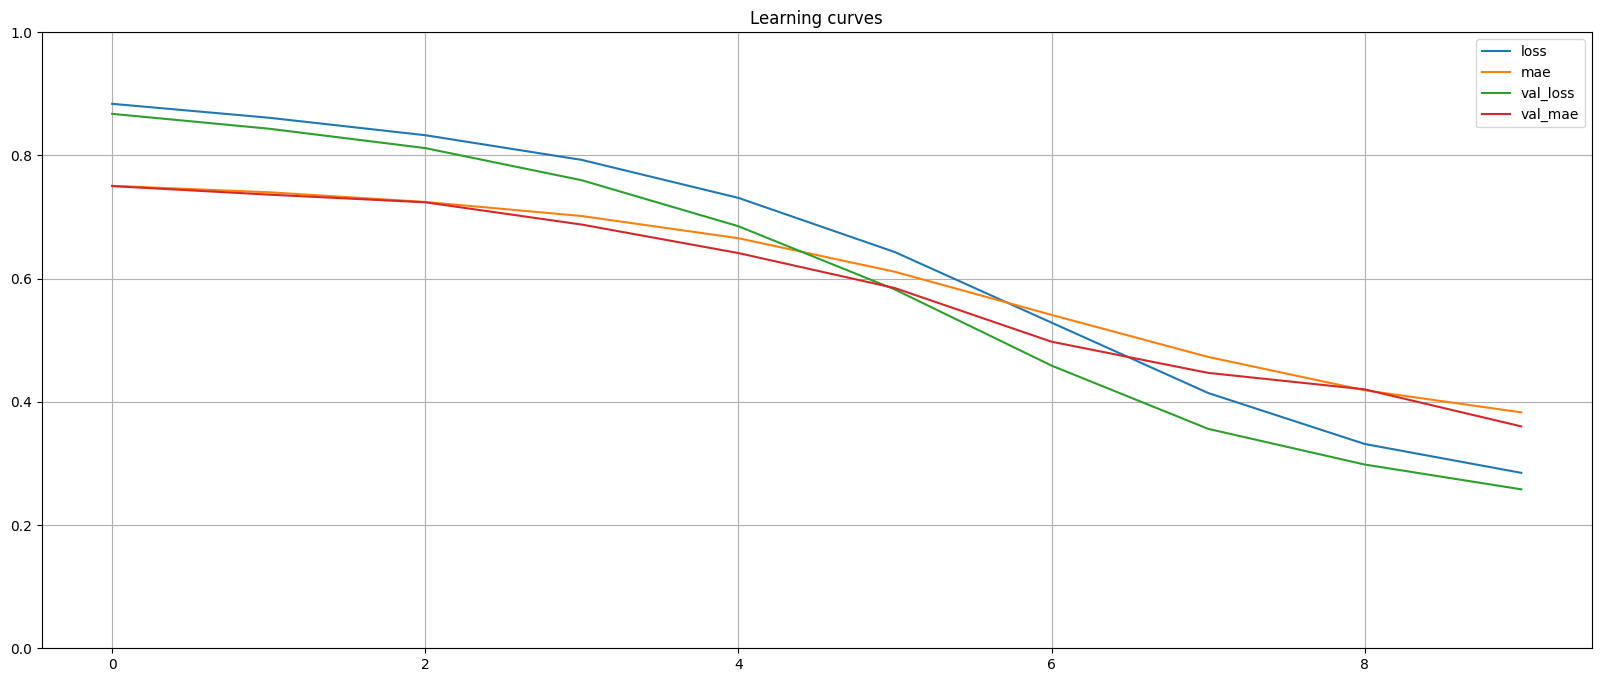

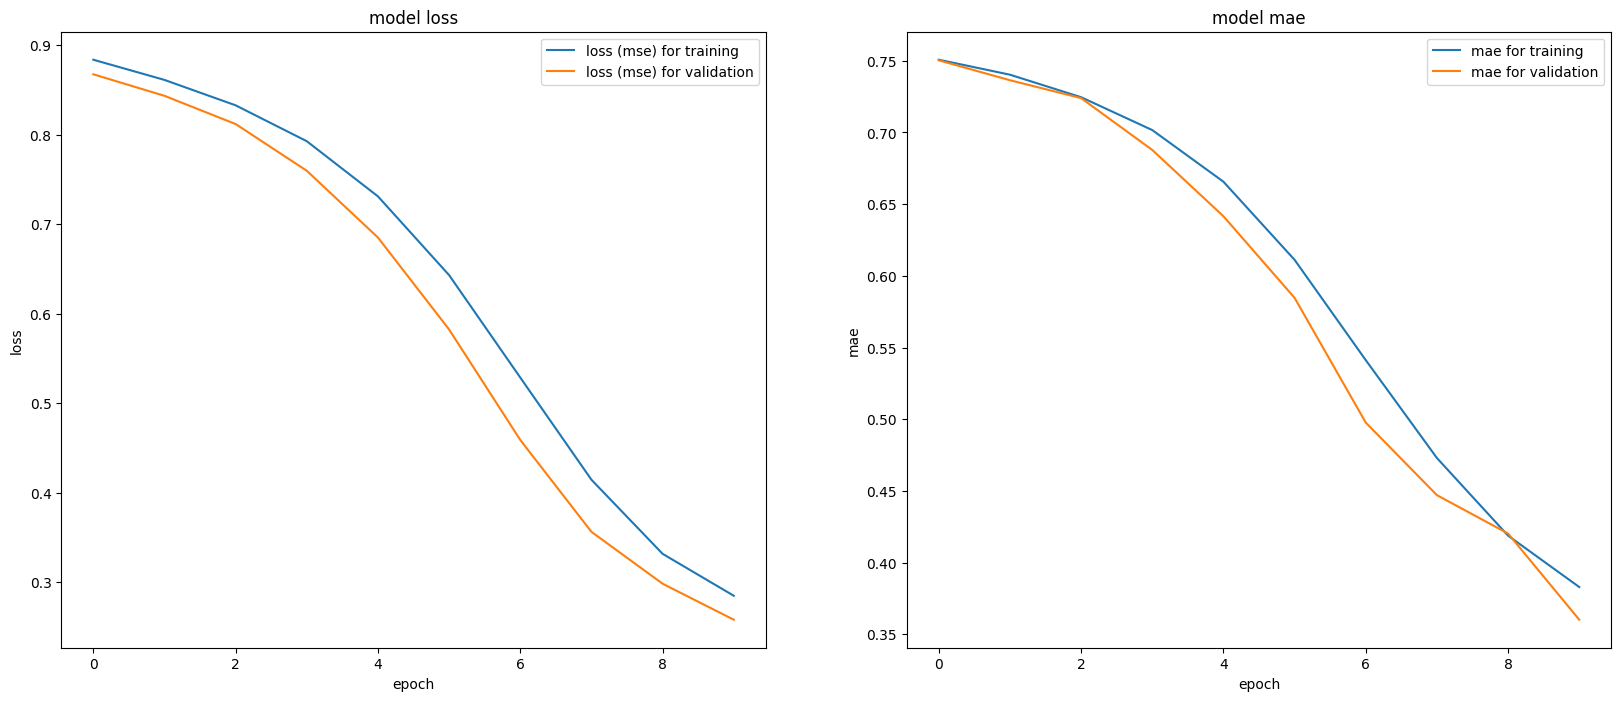

In [18]:
# Basic model with three fully connected layers

model_1a = Sequential([
    Dense(64, activation='sigmoid', input_shape=(6,)),
    Dense(64, activation='sigmoid'),
    Dense(1, activation='linear')
])

model_1a.compile(optimizer='SGD',
                 loss='mse',
                 metrics=['mae'])

model_1a.summary()

tf.keras.utils.plot_model(model_1a, to_file='model_1a.png')

history_1a = model_1a.fit(X_train_norm, y_train,
                          epochs=10,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.2)
# Learning curves
learning_curves(history_1a)

# Evaluation model
evaluation_model(history_1a)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/10
225/225 - 1s - 6ms/step - loss: 0.9497 - mae: 0.7769 - val_loss: 0.9275 - val_mae: 0.7459
Epoch 2/10
225/225 - 1s - 3ms/step - loss: 0.9028 - mae: 0.7587 - val_loss: 0.9031 - val_mae: 0.7830
Epoch 3/10
225/225 - 1s - 3ms/step - loss: 0.8836 - mae: 0.7487 - val_loss: 0.8670 - val_mae: 0.7547
Epoch 4/10
225/225 - 1s - 3ms/step - loss: 0.8635 - mae: 0.7377 - val_loss: 0.8425 - val_mae: 0.7312
Epoch 5/10
225/225 - 1s - 3ms/step - loss: 0.8383 - mae: 0.7232 - val_loss: 0.8144 - val_mae: 0.7219
Epoch 6/10
225/225 - 1s - 3ms/step - loss: 0.8060 - mae: 0.7049 - val_loss: 0.7805 - val_mae: 0.6861
Epoch 7/10
225/225 - 1s - 3ms/step - loss: 0.7626 - mae: 0.6786 - val_loss: 0.7283 - val_mae: 0.6733
Epoch 8/10
225/225 - 1s - 3ms/step - loss: 0.7044 - mae: 0.6437 - val_loss: 0.6618 - val_mae: 0.6301
Epoch 9/10
225/225 - 1s - 3ms/step - loss: 0.6321 - mae: 0.5975 - val_loss: 0.5939 - val_mae: 0.6124
Epoch 10/10
225/225 

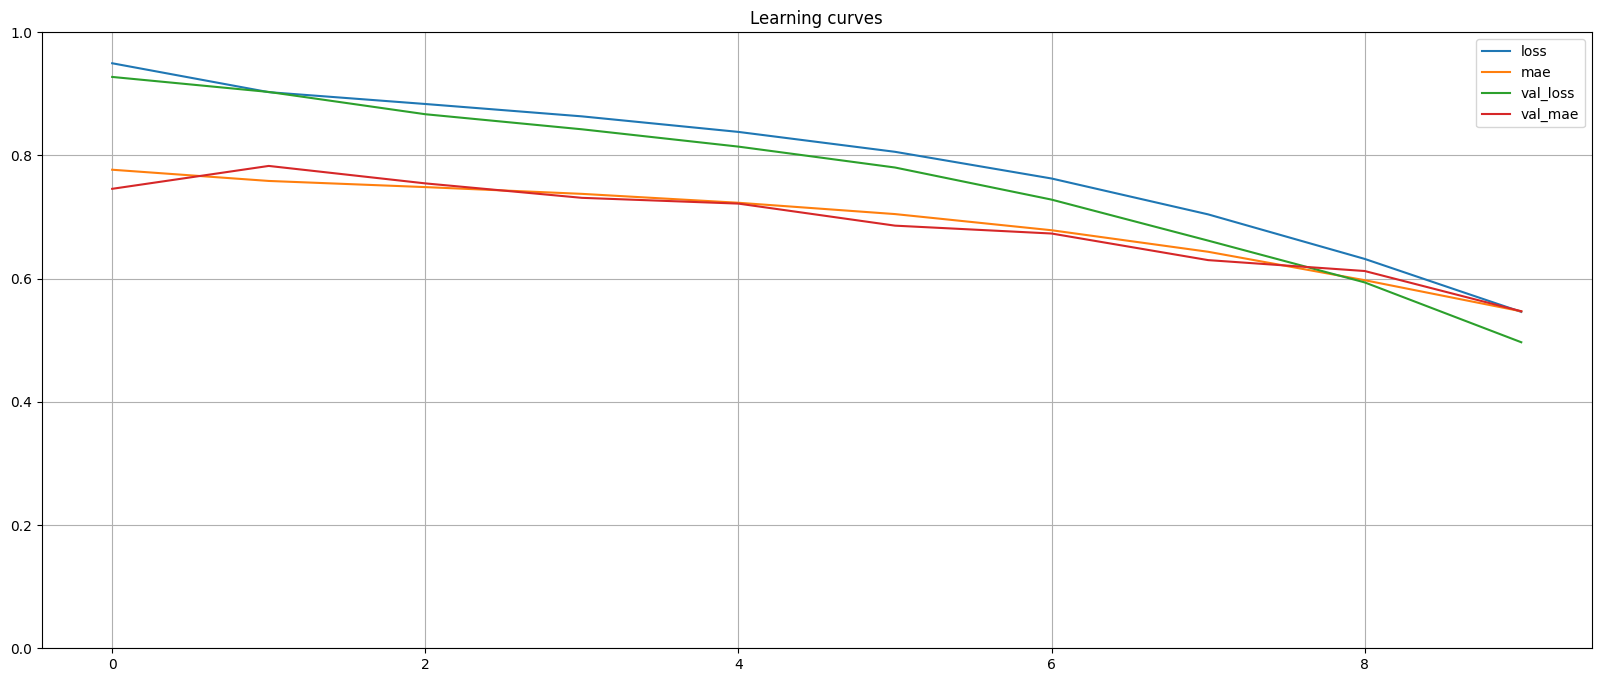

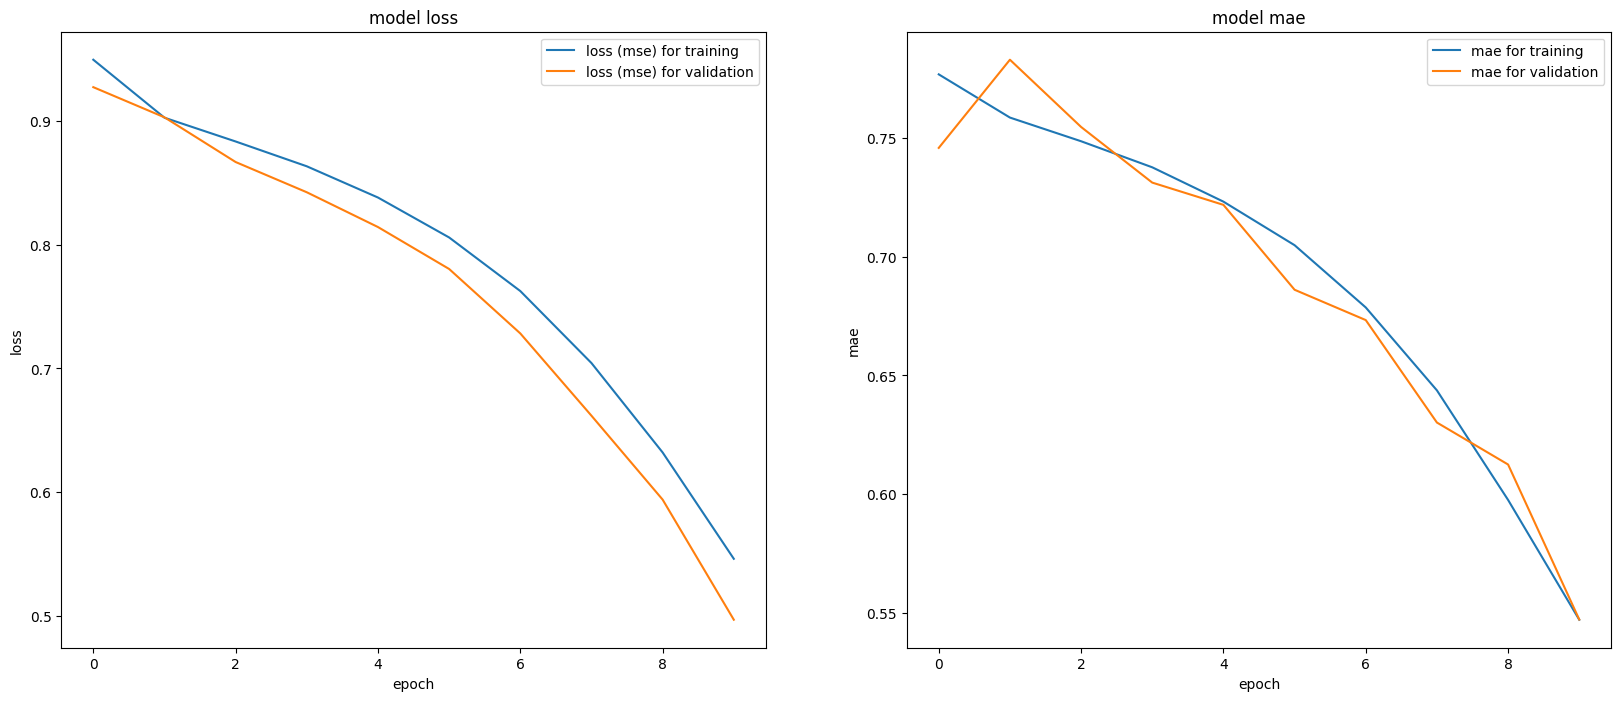

In [19]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4

model_1b = Sequential([
    Dense(64, activation='sigmoid', input_shape=(6,)),
    Dense(64, activation='sigmoid'),
    Dense(1, activation='linear')
])

model_1b.compile(optimizer='SGD',
                 loss='mse',
                 metrics=['mae'])

model_1b.summary()

tf.keras.utils.plot_model(model_1b, to_file='model_1b.png')

history_1b = model_1b.fit(X_train_norm, y_train,
                          epochs=10,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4)
# Learning curves
learning_curves(history_1b)

# Evaluation model
evaluation_model(history_1b)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,993 (50.75 KB)

 Trainable params: 12,993 (50.75 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/10
225/225 - 1s - 6ms/step - loss: 0.9253 - mae: 0.7670 - val_loss: 0.9072 - val_mae: 0.7822
Epoch 2/10
225/225 - 1s - 3ms/step - loss: 0.9086 - mae: 0.7633 - val_loss: 0.9118 - val_mae: 0.7867
Epoch 3/10
225/225 - 1s - 3ms/step - loss: 0.9084 - mae: 0.7635 - val_loss: 0.9272 - val_mae: 0.7983
Epoch 4/10
225/225 - 1s - 3ms/step - loss: 0.9091 - mae: 0.7639 - val_loss: 0.8989 - val_mae: 0.7658
Epoch 5/10
225/225 - 1s - 3ms/step - loss: 0.9085 - mae: 0.7629 - val_loss: 0.9177 - val_mae: 0.7916
Epoch 6/10
225/225 - 1s - 3ms/step - loss: 0.9081 - mae: 0.7631 - val_loss: 0.9140 - val_mae: 0.7887
Epoch 7/10
225/225 - 1s - 3ms/step - loss: 0.9082 - mae: 0.7632 - val_loss: 0.9003 - val_mae: 0.7601
Epoch 8/10
225/225 - 1s - 3ms/step - loss: 0.9079 - mae: 0.7627 - val_loss: 0.9005 - val_mae: 0.7736
Epoch 9/10
225/225 - 1s - 3ms/step - loss: 0.9078 - mae: 0.7632 - val_loss: 0.8984 - val_mae: 0.7666
Epoch 10/10
225/225 

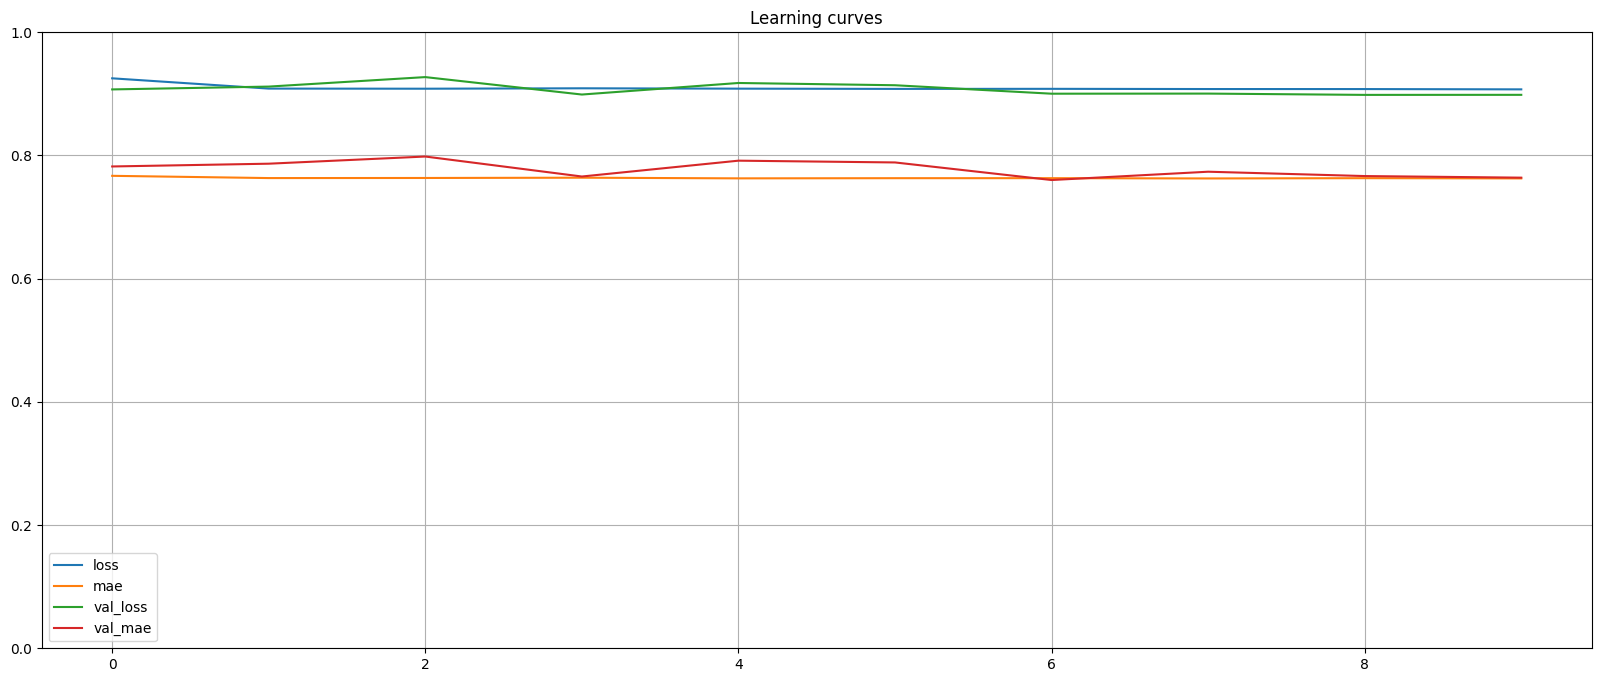

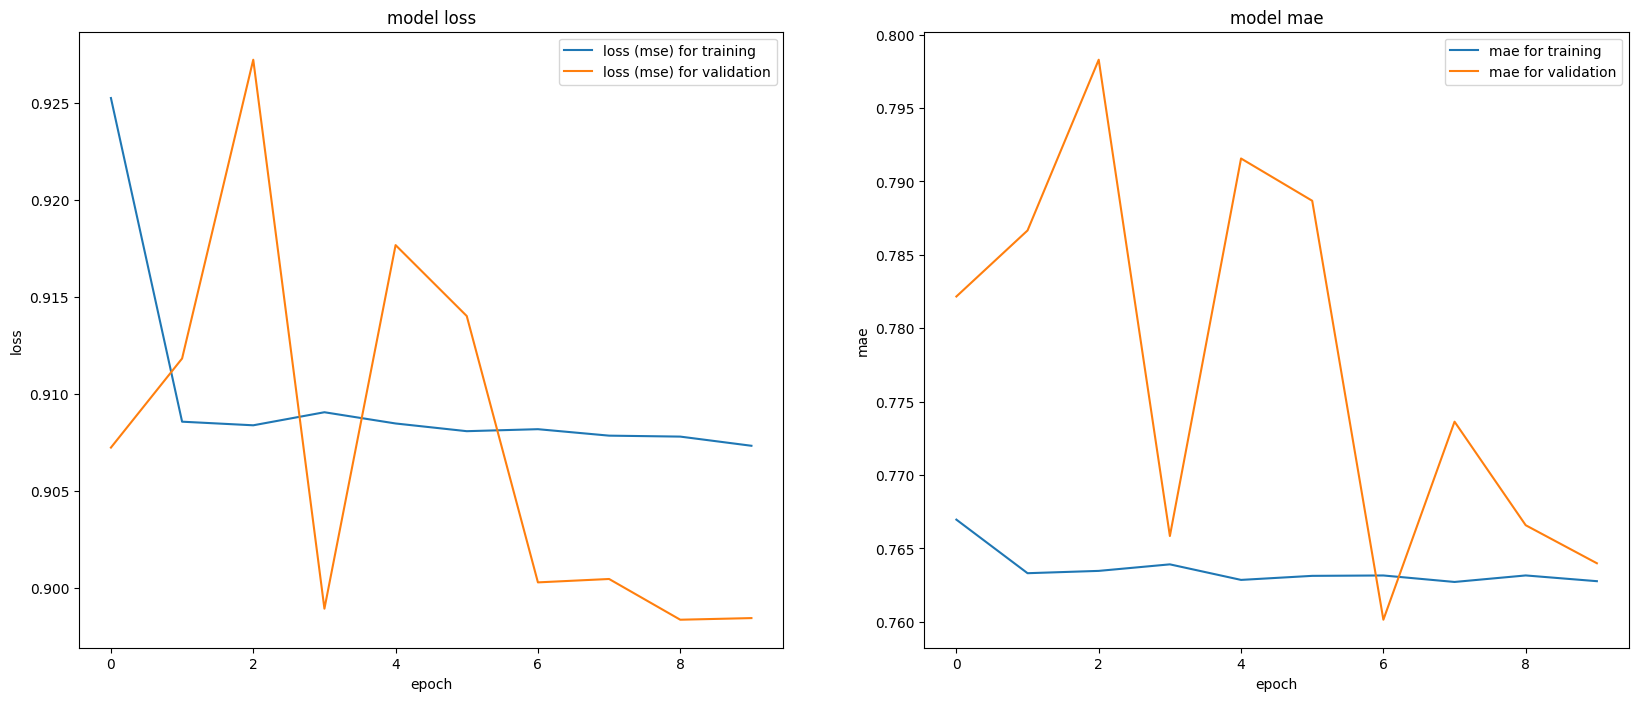

In [20]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers

model_1c = Sequential([
    Dense(64, activation='sigmoid', input_shape=(6,)),
    Dense(64, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(1, activation='linear')
])

model_1c.compile(optimizer='SGD',
                 loss='mse',
                 metrics=['mae'])

model_1c.summary()

tf.keras.utils.plot_model(model_1c, to_file='model_1c.png')

history_1c = model_1c.fit(X_train_norm, y_train,
                          epochs=10,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4)
# Learning curves
learning_curves(history_1c)

# Evaluation model
evaluation_model(history_1c)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,137 (293.50 KB)

 Trainable params: 75,137 (293.50 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/10
225/225 - 2s - 7ms/step - loss: 0.9235 - mae: 0.7669 - val_loss: 0.9001 - val_mae: 0.7720
Epoch 2/10
225/225 - 1s - 4ms/step - loss: 0.9085 - mae: 0.7633 - val_loss: 0.9242 - val_mae: 0.7460
Epoch 3/10
225/225 - 1s - 4ms/step - loss: 0.9089 - mae: 0.7630 - val_loss: 0.9111 - val_mae: 0.7512
Epoch 4/10
225/225 - 1s - 4ms/step - loss: 0.9090 - mae: 0.7632 - val_loss: 0.8988 - val_mae: 0.7645
Epoch 5/10
225/225 - 1s - 4ms/step - loss: 0.9084 - mae: 0.7632 - val_loss: 0.9001 - val_mae: 0.7729
Epoch 6/10
225/225 - 1s - 4ms/step - loss: 0.9085 - mae: 0.7633 - val_loss: 0.9365 - val_mae: 0.7425
Epoch 7/10
225/225 - 1s - 4ms/step - loss: 0.9084 - mae: 0.7630 - val_loss: 0.8983 - val_mae: 0.7665
Epoch 8/10
225/225 - 1s - 4ms/step - loss: 0.9080 - mae: 0.7629 - val_loss: 0.9030 - val_mae: 0.7780
Epoch 9/10
225/225 - 1s - 4ms/step - loss: 0.9081 - mae: 0.7632 - val_loss: 0.9024 - val_mae: 0.7564
Epoch 10/10
225/225 

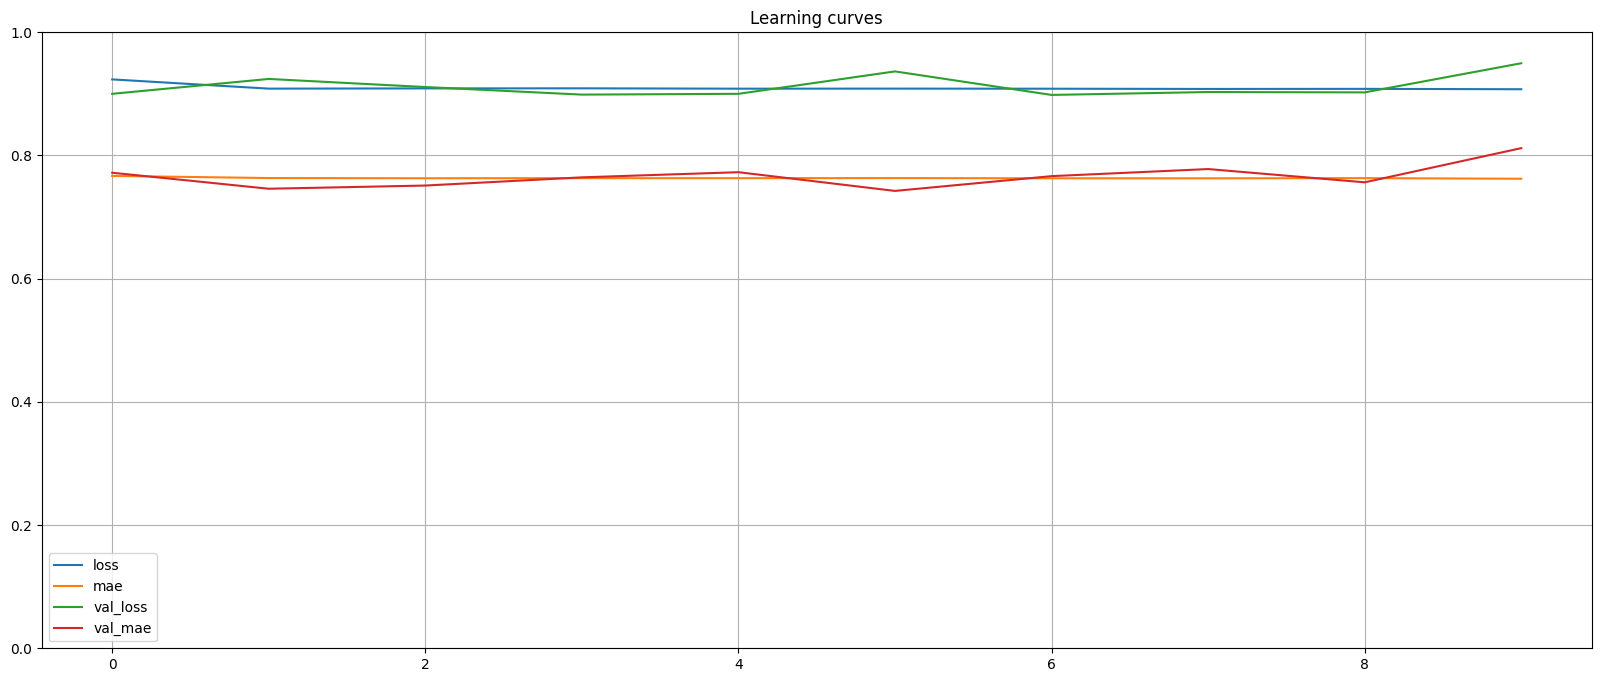

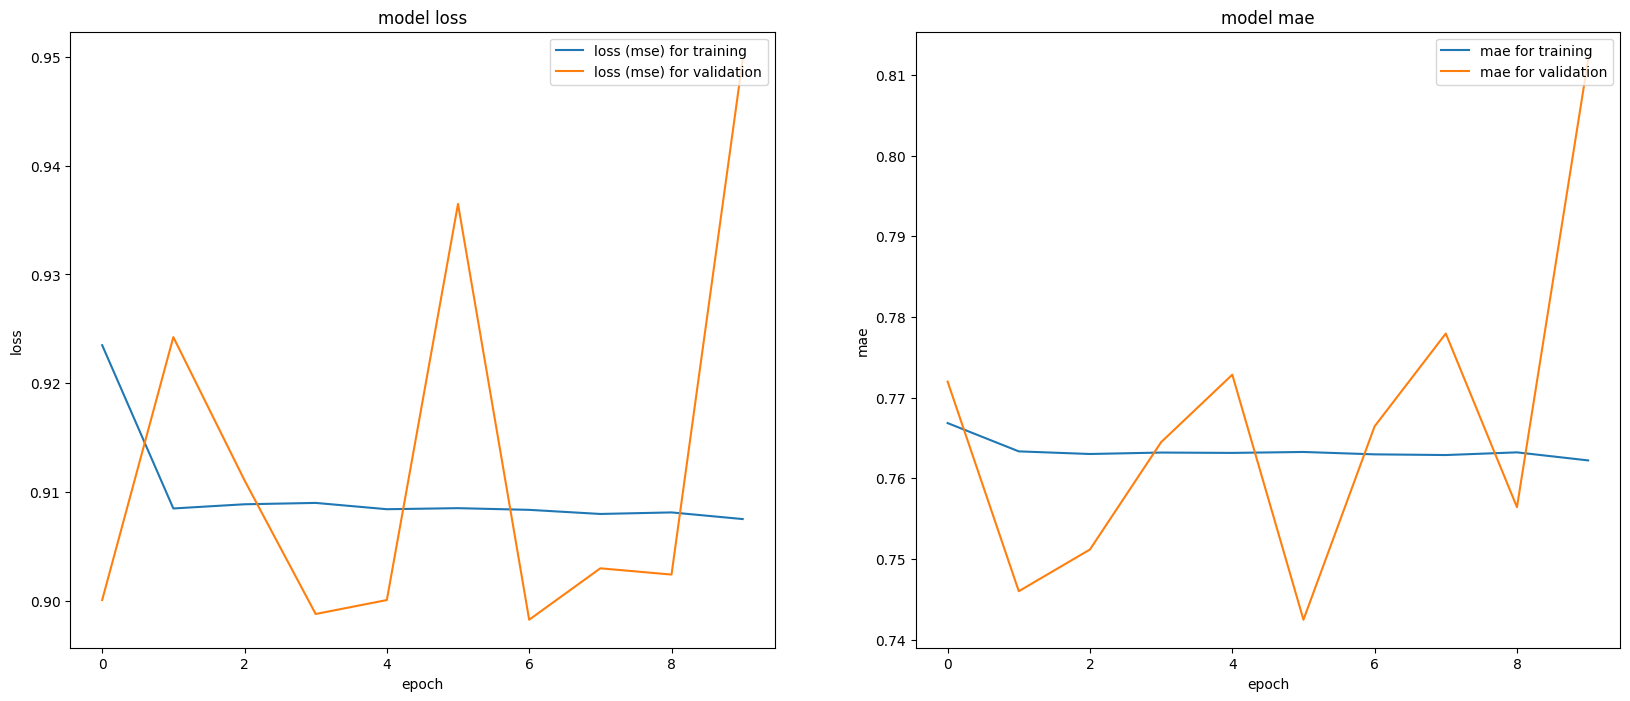

In [21]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers

model_1d = Sequential([
    Dense(128, activation='sigmoid', input_shape=(6,)),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(1, activation='linear')
])

model_1d.compile(optimizer='SGD',
                 loss='mse',
                 metrics=['mae'])

model_1d.summary()

tf.keras.utils.plot_model(model_1d, to_file='model_1d.png')

history_1d = model_1d.fit(X_train_norm, y_train,
                          epochs=10,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4)
# Learning curves
learning_curves(history_1d)

# Evaluation model
evaluation_model(history_1d)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,137 (293.50 KB)

 Trainable params: 75,137 (293.50 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/10
225/225 - 2s - 7ms/step - loss: 0.5409 - mae: 0.5191 - val_loss: 0.2223 - val_mae: 0.3369
Epoch 2/10
225/225 - 1s - 4ms/step - loss: 0.0979 - mae: 0.2074 - val_loss: 0.0230 - val_mae: 0.1005
Epoch 3/10
225/225 - 1s - 4ms/step - loss: 0.0101 - mae: 0.0667 - val_loss: 0.0046 - val_mae: 0.0436
Epoch 4/10
225/225 - 1s - 4ms/step - loss: 0.0032 - mae: 0.0355 - val_loss: 0.0020 - val_mae: 0.0274
Epoch 5/10
225/225 - 1s - 4ms/step - loss: 0.0017 - mae: 0.0253 - val_loss: 0.0012 - val_mae: 0.0215
Epoch 6/10
225/225 - 1s - 4ms/step - loss: 0.0011 - mae: 0.0208 - val_loss: 9.8907e-04 - val_mae: 0.0192
Epoch 7/10
225/225 - 1s - 4ms/step - loss: 8.6471e-04 - mae: 0.0185 - val_loss: 8.7625e-04 - val_mae: 0.0183
Epoch 8/10
225/225 - 1s - 3ms/step - loss: 7.8708e-04 - mae: 0.0181 - val_loss: 6.9207e-04 - val_mae: 0.0162
Epoch 9/10
225/225 - 1s - 4ms/step - loss: 6.8806e-04 - mae: 0.0168 - val_loss: 6.4165e-04 - val_mae:

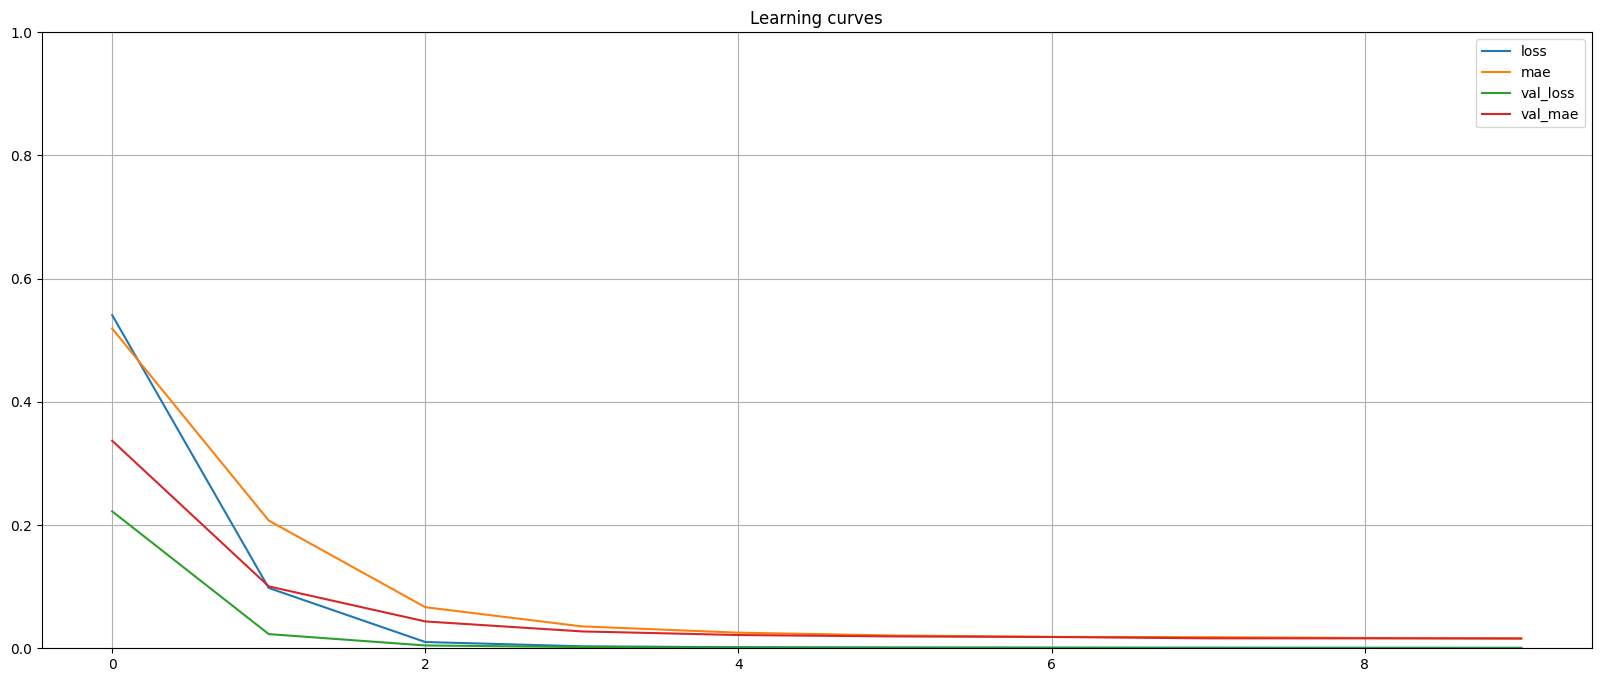

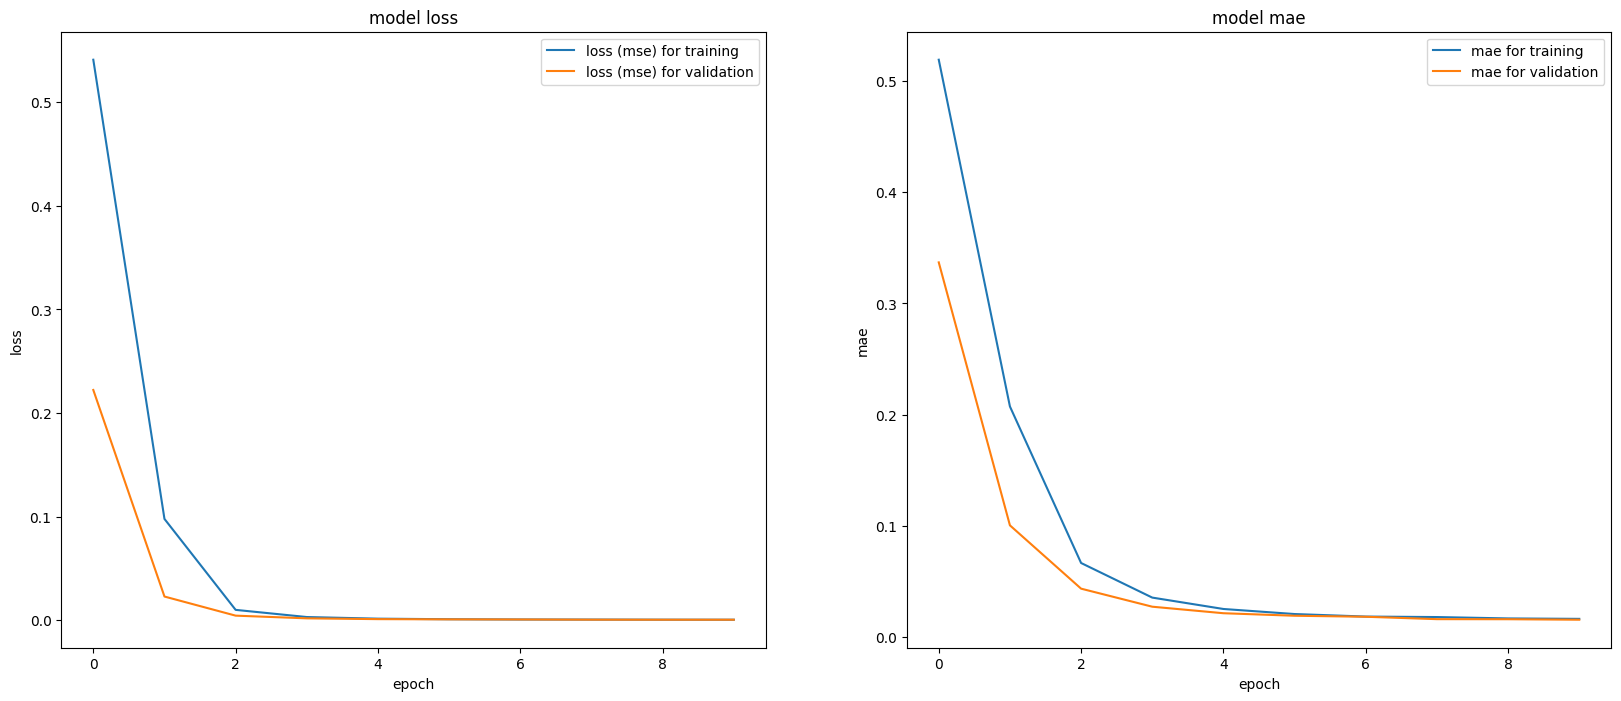

In [22]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers
# + Changing the activation function

model_1e = Sequential([
    Dense(128, activation='relu', input_shape=(6,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model_1e.compile(optimizer='SGD',
                 loss='mse',
                 metrics=['mae'])

model_1e.summary()

tf.keras.utils.plot_model(model_1e, to_file='model_1e.png')

history_1e = model_1e.fit(X_train_norm, y_train,
                          epochs=10,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4)
# Learning curves
learning_curves(history_1e)

# Evaluation model
evaluation_model(history_1e)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,137 (293.50 KB)

 Trainable params: 75,137 (293.50 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/10
225/225 - 3s - 12ms/step - loss: 0.1307 - mae: 0.1461 - val_loss: 5.2301e-04 - val_mae: 0.0159
Epoch 2/10
225/225 - 1s - 4ms/step - loss: 5.1935e-04 - mae: 0.0160 - val_loss: 6.0022e-04 - val_mae: 0.0193
Epoch 3/10
225/225 - 1s - 5ms/step - loss: 4.5288e-04 - mae: 0.0149 - val_loss: 5.7060e-04 - val_mae: 0.0188
Epoch 4/10
225/225 - 1s - 6ms/step - loss: 4.3976e-04 - mae: 0.0147 - val_loss: 4.6242e-04 - val_mae: 0.0156
Epoch 5/10
225/225 - 1s - 4ms/step - loss: 4.1977e-04 - mae: 0.0142 - val_loss: 4.3822e-04 - val_mae: 0.0148
Epoch 6/10
225/225 - 1s - 4ms/step - loss: 4.6432e-04 - mae: 0.0153 - val_loss: 3.8987e-04 - val_mae: 0.0129
Epoch 7/10
225/225 - 1s - 4ms/step - loss: 4.5048e-04 - mae: 0.0150 - val_loss: 6.7826e-04 - val_mae: 0.0201
Epoch 8/10
225/225 - 1s - 4ms/step - loss: 4.4712e-04 - mae: 0.0149 - val_loss: 9.3951e-04 - val_mae: 0.0260
Epoch 9/10
225/225 - 1s - 4ms/step - loss: 4.5514e-04 - mae:

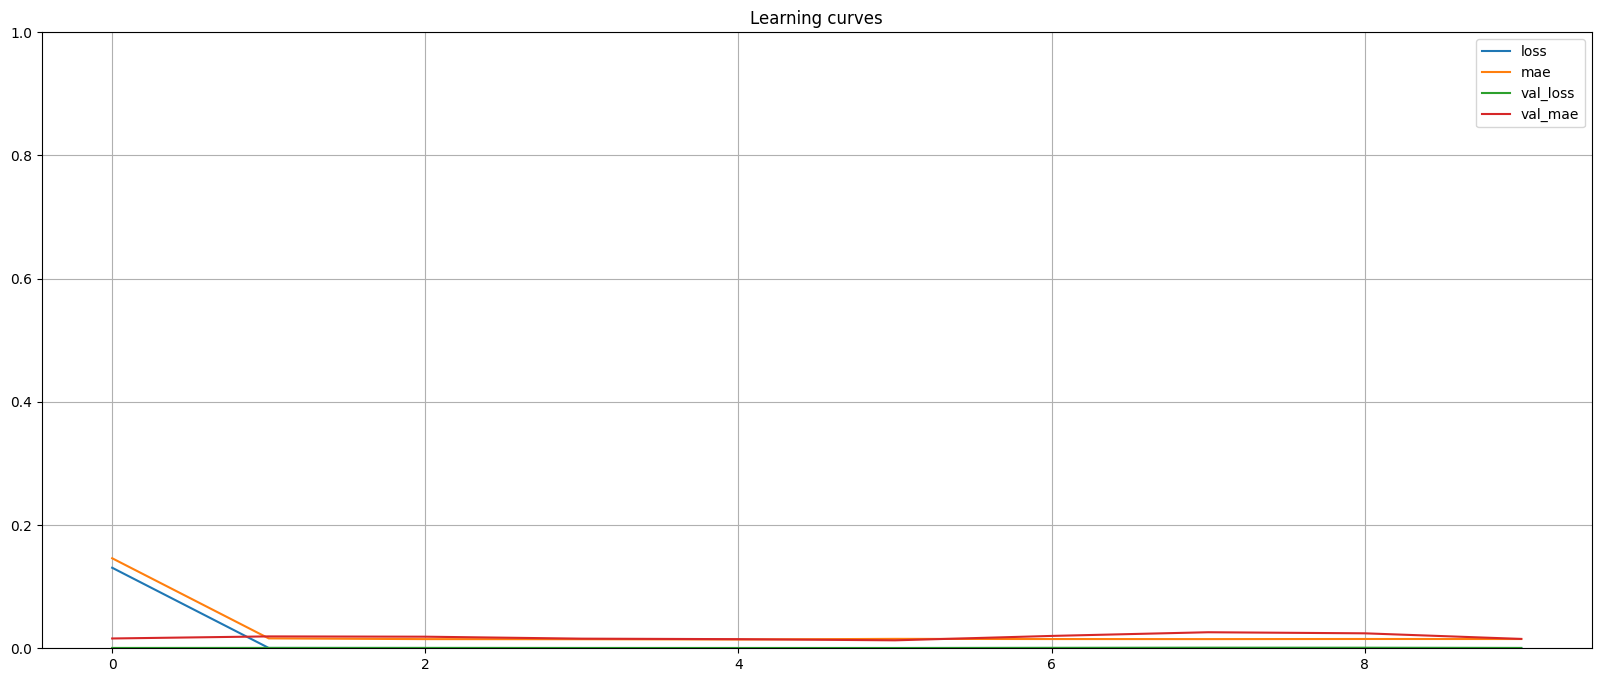

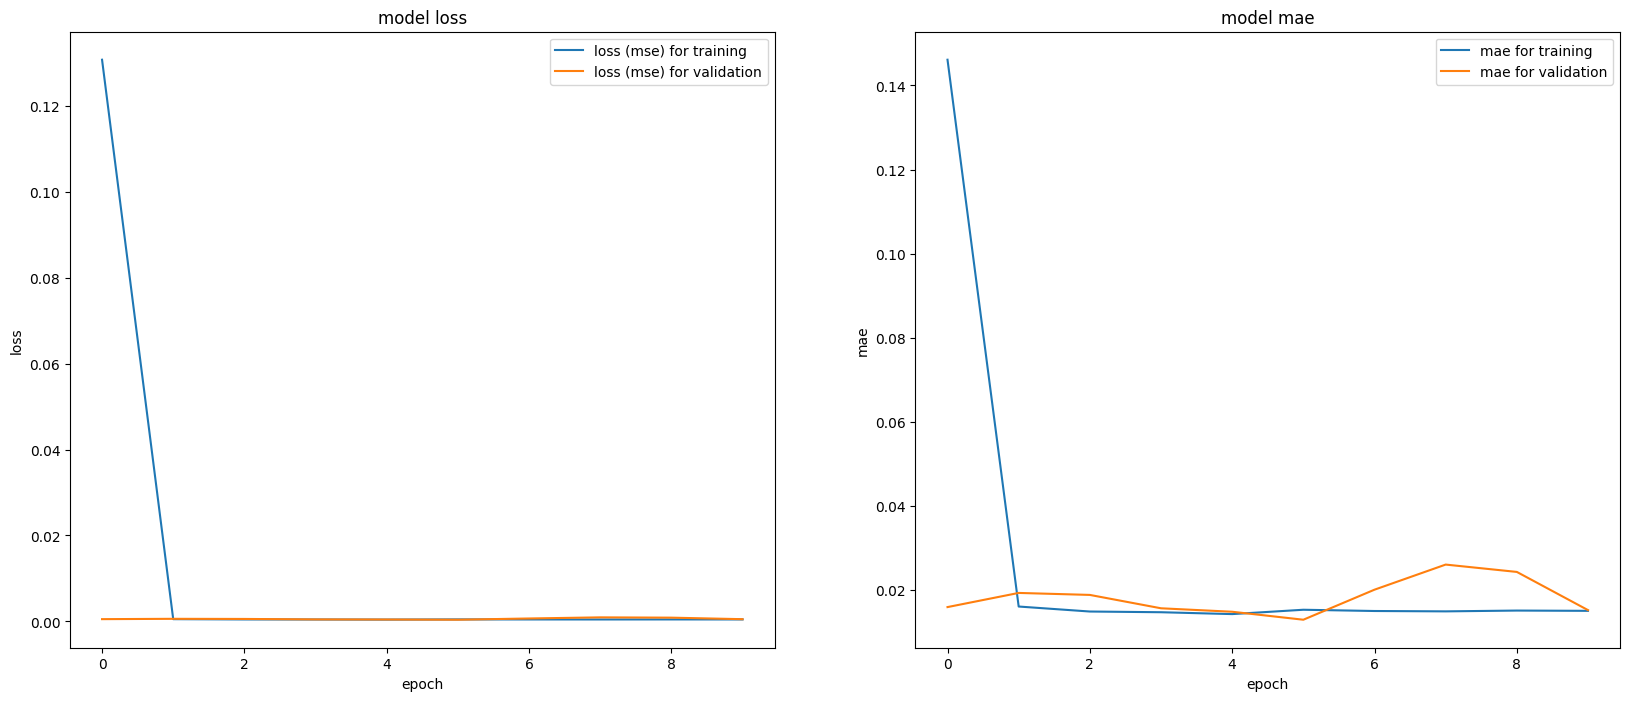

In [23]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers
# + Changing the activation function
# + Changing the optimization function

model_1f = Sequential([
    Dense(128, activation='relu', input_shape=(6,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model_1f.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_1f.summary()

tf.keras.utils.plot_model(model_1f, to_file='model_1f.png')

history_1f = model_1f.fit(X_train_norm, y_train,
                          epochs=10,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4)
# Learning curves
learning_curves(history_1f)

# Evaluation model
evaluation_model(history_1f)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,137 (293.50 KB)

 Trainable params: 75,137 (293.50 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/50
225/225 - 3s - 12ms/step - loss: 0.1323 - mae: 0.1488 - val_loss: 5.9238e-04 - val_mae: 0.0160
Epoch 2/50
225/225 - 1s - 4ms/step - loss: 5.1327e-04 - mae: 0.0156 - val_loss: 6.6005e-04 - val_mae: 0.0181
Epoch 3/50
225/225 - 1s - 4ms/step - loss: 4.7575e-04 - mae: 0.0152 - val_loss: 4.0827e-04 - val_mae: 0.0133
Epoch 4/50
225/225 - 1s - 4ms/step - loss: 4.6923e-04 - mae: 0.0152 - val_loss: 7.7334e-04 - val_mae: 0.0224
Epoch 5/50
225/225 - 1s - 4ms/step - loss: 4.8690e-04 - mae: 0.0157 - val_loss: 3.9831e-04 - val_mae: 0.0131
Epoch 6/50
225/225 - 1s - 4ms/step - loss: 4.7008e-04 - mae: 0.0154 - val_loss: 4.5973e-04 - val_mae: 0.0145
Epoch 7/50
225/225 - 1s - 4ms/step - loss: 4.8919e-04 - mae: 0.0157 - val_loss: 3.8396e-04 - val_mae: 0.0134
Epoch 8/50
225/225 - 1s - 4ms/step - loss: 5.1261e-04 - mae: 0.0164 - val_loss: 3.8577e-04 - val_mae: 0.0127
Epoch 9/50
225/225 - 1s - 4ms/step - loss: 4.2595e-04 - mae:

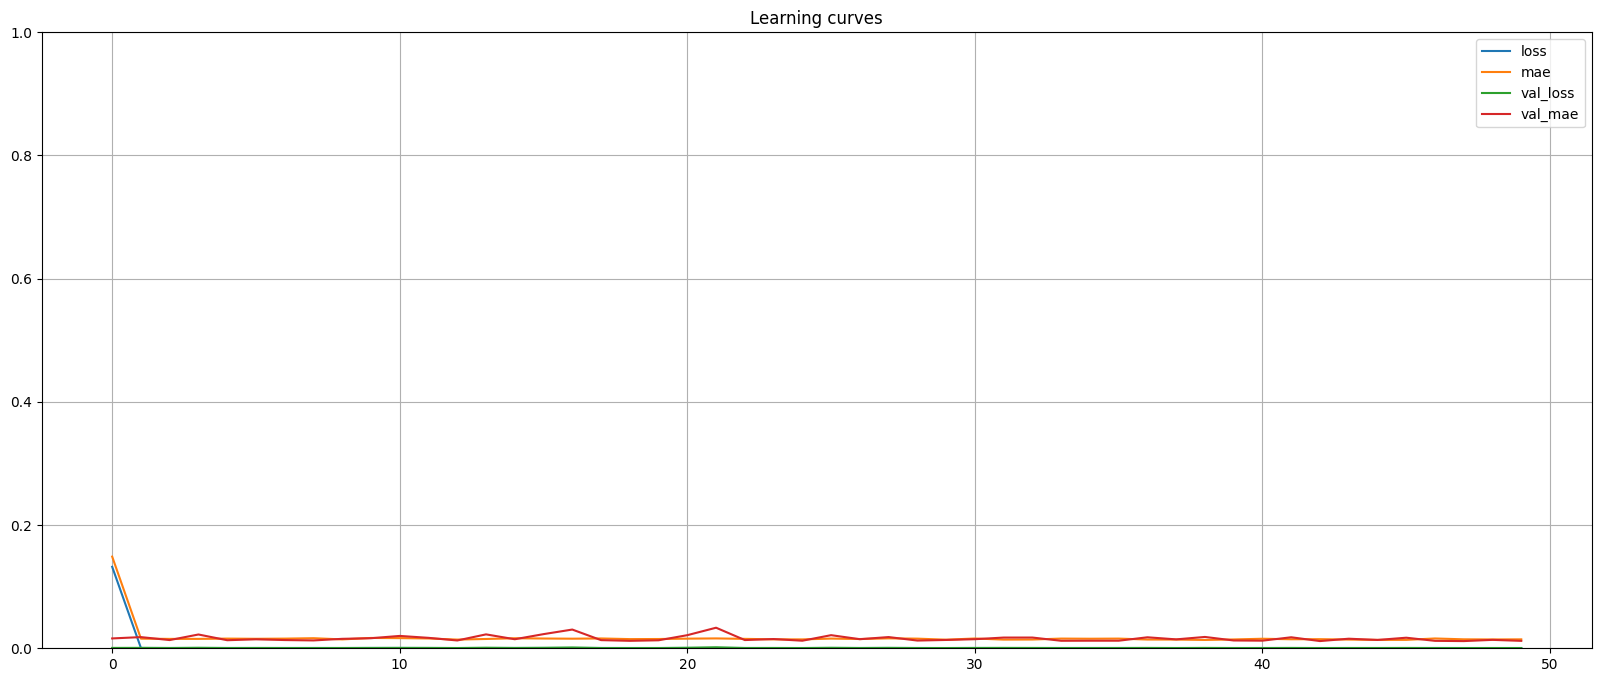

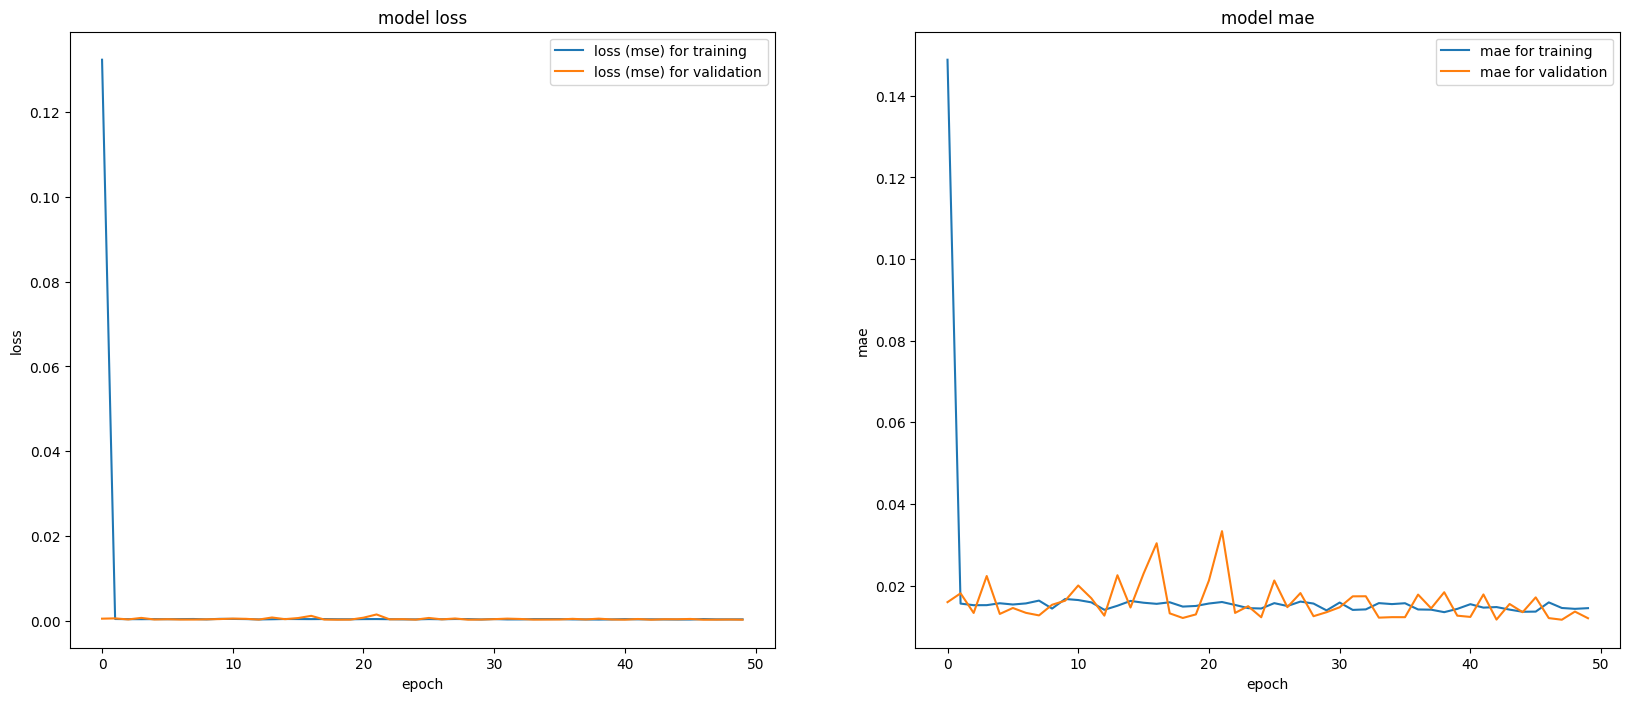

In [24]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers
# + Changing the activation function
# + Changing the optimization function
# + Increasing the number of training epochs

model_1g = Sequential([
    Dense(128, activation='relu', input_shape=(6,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model_1g.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_1g.summary()

tf.keras.utils.plot_model(model_1g, to_file='model_1g.png')

history_1g = model_1g.fit(X_train_norm, y_train,
                          epochs=50,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4)
# Learning curves
learning_curves(history_1g)

# Evaluation model
evaluation_model(history_1g)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,137 (293.50 KB)

 Trainable params: 75,137 (293.50 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/50


225/225 - 3s - 12ms/step - loss: 0.1256 - mae: 0.1456 - val_loss: 6.6185e-04 - val_mae: 0.0177
Epoch 2/50


225/225 - 1s - 4ms/step - loss: 5.5900e-04 - mae: 0.0166 - val_loss: 5.8372e-04 - val_mae: 0.0181
Epoch 3/50


225/225 - 1s - 5ms/step - loss: 5.2472e-04 - mae: 0.0162 - val_loss: 4.6971e-04 - val_mae: 0.0152
Epoch 4/50
225/225 - 1s - 5ms/step - loss: 4.3548e-04 - mae: 0.0145 - val_loss: 4.8203e-04 - val_mae: 0.0163
Epoch 5/50
225/225 - 1s - 5ms/step - loss: 4.5314e-04 - mae: 0.0150 - val_loss: 8.4988e-04 - val_mae: 0.0227
Epoch 6/50


225/225 - 1s - 5ms/step - loss: 4.2190e-04 - mae: 0.0144 - val_loss: 3.8707e-04 - val_mae: 0.0129
Epoch 7/50
225/225 - 1s - 4ms/step - loss: 5.1078e-04 - mae: 0.0163 - val_loss: 4.1004e-04 - val_mae: 0.0137
Epoch 8/50
225/225 - 1s - 4ms/step - loss: 4.7775e-04 - mae: 0.0156 - val_loss: 9.8117e-04 - val_mae: 0.0263
Epoch 9/50
225/225 - 1s - 4ms/step - loss: 4.5045e-04 - mae: 0.0150 - val_loss: 0.0010 - val_mae: 0.0261
Epoch 10/50
225/225 - 1s - 4ms/step - loss: 4.6478e-04 - mae: 0.0154 - val_loss: 9.4454e-04 - val_mae: 0.0247
Epoch 11/50
225/225 - 1s - 4ms/step - loss: 5.2082e-04 - mae: 0.0165 - val_loss: 0.0012 - val_mae: 0.0286


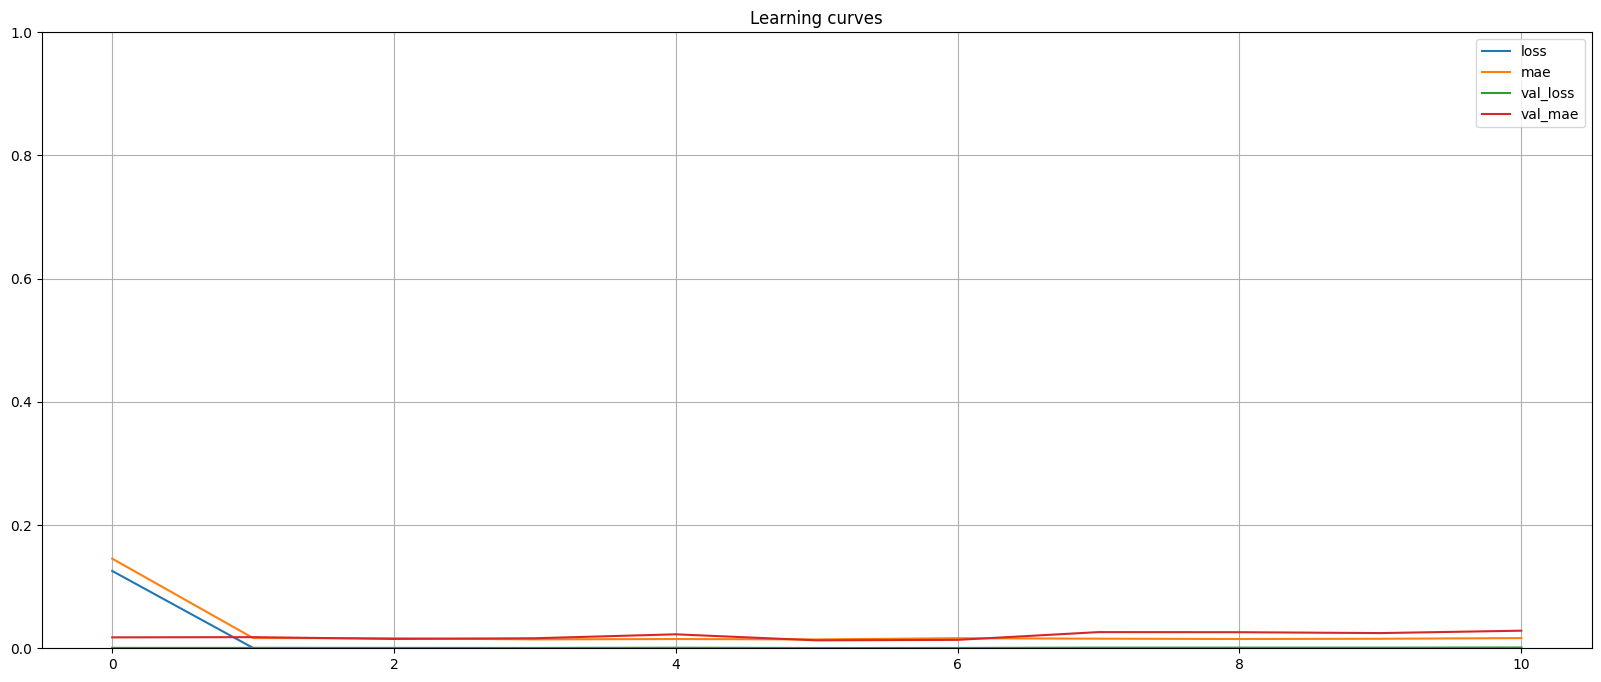

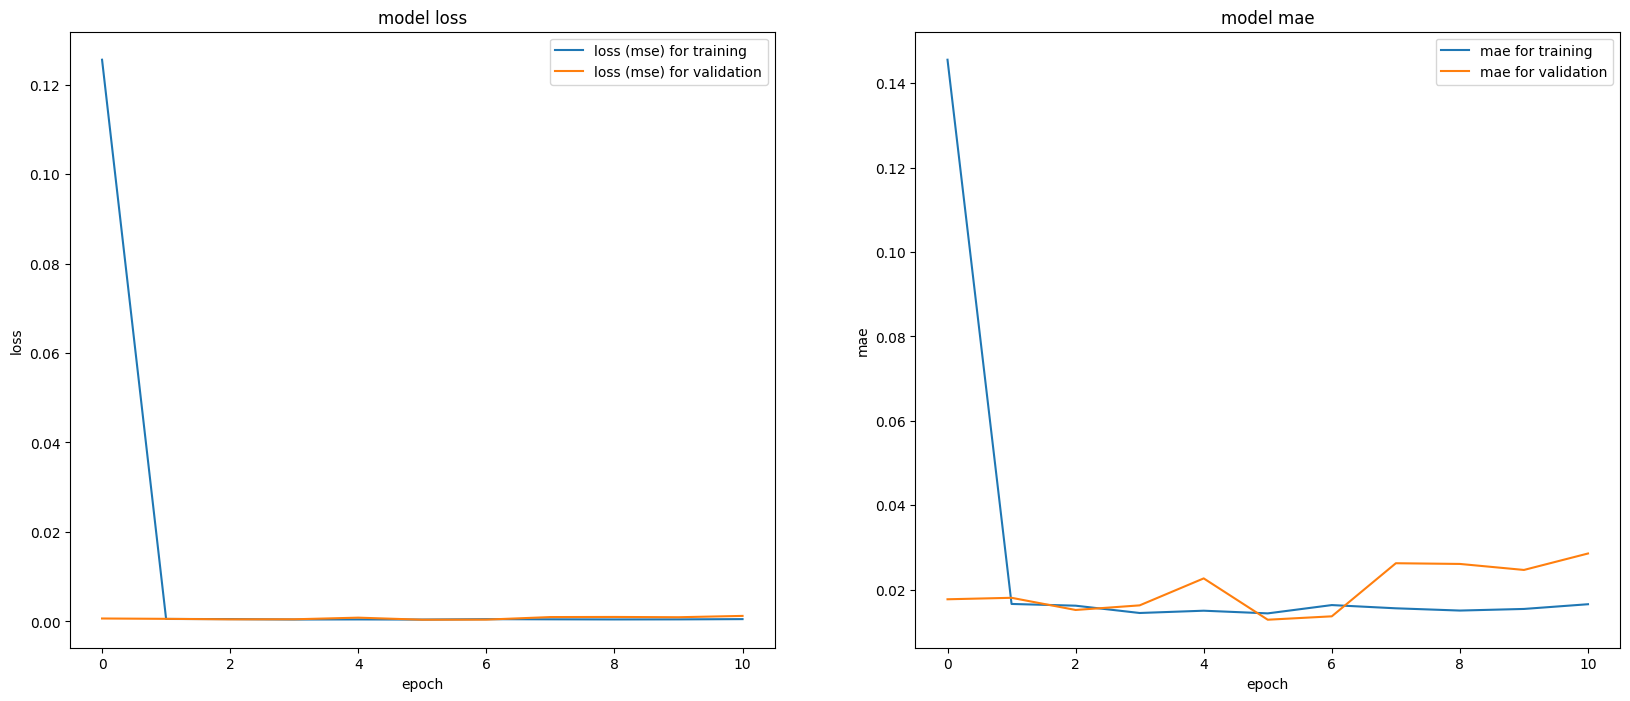

In [25]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers
# + Changing the activation function
# + Changing the optimization function
# + Increasing the number of training epochs
# + Applying an early stopping and saving the best model

model_1h = Sequential([
    Dense(128, activation='relu', input_shape=(6,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model_1h.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_1h.summary()

tf.keras.utils.plot_model(model_1h, to_file='model_1h.png')

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model_1h.h5",
                                                   save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                     restore_best_weights=True)

history_1h = model_1h.fit(X_train_norm, y_train,
                          epochs=50,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4,
                          callbacks=[checkpoint_cb, early_stopping_cb])
# Learning curves
learning_curves(history_1h)

# Evaluation model
evaluation_model(history_1h)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,137 (293.50 KB)

 Trainable params: 75,137 (293.50 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/50


225/225 - 3s - 14ms/step - loss: 26.0228 - mae: 0.2137 - val_loss: 4.8325 - val_mae: 0.1659
Epoch 2/50


225/225 - 1s - 5ms/step - loss: 2.6744 - mae: 0.1244 - val_loss: 1.7140 - val_mae: 0.0814
Epoch 3/50


225/225 - 1s - 4ms/step - loss: 1.2618 - mae: 0.0652 - val_loss: 0.8912 - val_mae: 0.0580
Epoch 4/50


225/225 - 1s - 4ms/step - loss: 0.6561 - mae: 0.0433 - val_loss: 0.4619 - val_mae: 0.0332
Epoch 5/50


225/225 - 1s - 5ms/step - loss: 0.3518 - mae: 0.0315 - val_loss: 0.2712 - val_mae: 0.0270
Epoch 6/50


225/225 - 1s - 4ms/step - loss: 0.2357 - mae: 0.0250 - val_loss: 0.2122 - val_mae: 0.0238
Epoch 7/50


225/225 - 1s - 4ms/step - loss: 0.1987 - mae: 0.0231 - val_loss: 0.1869 - val_mae: 0.0216
Epoch 8/50


225/225 - 1s - 4ms/step - loss: 0.1812 - mae: 0.0227 - val_loss: 0.1769 - val_mae: 0.0243
Epoch 9/50


225/225 - 1s - 5ms/step - loss: 0.1729 - mae: 0.0239 - val_loss: 0.1690 - val_mae: 0.0239
Epoch 10/50


225/225 - 1s - 5ms/step - loss: 0.1669 - mae: 0.0240 - val_loss: 0.1651 - val_mae: 0.0239
Epoch 11/50


225/225 - 1s - 6ms/step - loss: 0.1633 - mae: 0.0237 - val_loss: 0.1615 - val_mae: 0.0229
Epoch 12/50


225/225 - 1s - 5ms/step - loss: 0.1596 - mae: 0.0236 - val_loss: 0.1580 - val_mae: 0.0247
Epoch 13/50


225/225 - 1s - 5ms/step - loss: 0.1548 - mae: 0.0236 - val_loss: 0.1516 - val_mae: 0.0225
Epoch 14/50


225/225 - 1s - 6ms/step - loss: 0.1497 - mae: 0.0234 - val_loss: 0.1480 - val_mae: 0.0232
Epoch 15/50


225/225 - 1s - 4ms/step - loss: 0.1461 - mae: 0.0230 - val_loss: 0.1447 - val_mae: 0.0247
Epoch 16/50


225/225 - 1s - 5ms/step - loss: 0.1422 - mae: 0.0223 - val_loss: 0.1406 - val_mae: 0.0212
Epoch 17/50


225/225 - 1s - 6ms/step - loss: 0.1394 - mae: 0.0217 - val_loss: 0.1382 - val_mae: 0.0207
Epoch 18/50
225/225 - 1s - 5ms/step - loss: 0.1383 - mae: 0.0217 - val_loss: 0.1384 - val_mae: 0.0235
Epoch 19/50


225/225 - 1s - 5ms/step - loss: 0.1378 - mae: 0.0217 - val_loss: 0.1373 - val_mae: 0.0218
Epoch 20/50
225/225 - 1s - 4ms/step - loss: 0.1374 - mae: 0.0215 - val_loss: 0.1374 - val_mae: 0.0206
Epoch 21/50


225/225 - 1s - 5ms/step - loss: 0.1370 - mae: 0.0213 - val_loss: 0.1366 - val_mae: 0.0221
Epoch 22/50


225/225 - 1s - 4ms/step - loss: 0.1366 - mae: 0.0213 - val_loss: 0.1364 - val_mae: 0.0213
Epoch 23/50


225/225 - 1s - 5ms/step - loss: 0.1362 - mae: 0.0212 - val_loss: 0.1363 - val_mae: 0.0206
Epoch 24/50


225/225 - 1s - 4ms/step - loss: 0.1358 - mae: 0.0210 - val_loss: 0.1355 - val_mae: 0.0205
Epoch 25/50


225/225 - 1s - 4ms/step - loss: 0.1355 - mae: 0.0214 - val_loss: 0.1350 - val_mae: 0.0209
Epoch 26/50


225/225 - 1s - 6ms/step - loss: 0.1351 - mae: 0.0210 - val_loss: 0.1349 - val_mae: 0.0202
Epoch 27/50


225/225 - 1s - 5ms/step - loss: 0.1349 - mae: 0.0214 - val_loss: 0.1345 - val_mae: 0.0208
Epoch 28/50


225/225 - 1s - 6ms/step - loss: 0.1345 - mae: 0.0208 - val_loss: 0.1343 - val_mae: 0.0203
Epoch 29/50


225/225 - 1s - 5ms/step - loss: 0.1342 - mae: 0.0208 - val_loss: 0.1336 - val_mae: 0.0199
Epoch 30/50
225/225 - 1s - 6ms/step - loss: 0.1338 - mae: 0.0209 - val_loss: 0.1337 - val_mae: 0.0202
Epoch 31/50
225/225 - 1s - 5ms/step - loss: 0.1336 - mae: 0.0209 - val_loss: 0.1337 - val_mae: 0.0212
Epoch 32/50


225/225 - 1s - 6ms/step - loss: 0.1333 - mae: 0.0209 - val_loss: 0.1332 - val_mae: 0.0198
Epoch 33/50


225/225 - 1s - 5ms/step - loss: 0.1330 - mae: 0.0208 - val_loss: 0.1325 - val_mae: 0.0204
Epoch 34/50
225/225 - 1s - 4ms/step - loss: 0.1327 - mae: 0.0208 - val_loss: 0.1327 - val_mae: 0.0216
Epoch 35/50


225/225 - 1s - 5ms/step - loss: 0.1324 - mae: 0.0207 - val_loss: 0.1320 - val_mae: 0.0205
Epoch 36/50
225/225 - 1s - 4ms/step - loss: 0.1322 - mae: 0.0208 - val_loss: 0.1321 - val_mae: 0.0200
Epoch 37/50


225/225 - 1s - 4ms/step - loss: 0.1319 - mae: 0.0205 - val_loss: 0.1316 - val_mae: 0.0198
Epoch 38/50
225/225 - 1s - 4ms/step - loss: 0.1317 - mae: 0.0206 - val_loss: 0.1317 - val_mae: 0.0194
Epoch 39/50
225/225 - 1s - 5ms/step - loss: 0.1314 - mae: 0.0205 - val_loss: 0.1317 - val_mae: 0.0219
Epoch 40/50


225/225 - 1s - 5ms/step - loss: 0.1312 - mae: 0.0206 - val_loss: 0.1312 - val_mae: 0.0213
Epoch 41/50


225/225 - 1s - 4ms/step - loss: 0.1310 - mae: 0.0204 - val_loss: 0.1307 - val_mae: 0.0196
Epoch 42/50
225/225 - 1s - 4ms/step - loss: 0.1308 - mae: 0.0206 - val_loss: 0.1307 - val_mae: 0.0206
Epoch 43/50


225/225 - 1s - 4ms/step - loss: 0.1306 - mae: 0.0205 - val_loss: 0.1304 - val_mae: 0.0213
Epoch 44/50


225/225 - 1s - 4ms/step - loss: 0.1304 - mae: 0.0207 - val_loss: 0.1304 - val_mae: 0.0205
Epoch 45/50


225/225 - 1s - 4ms/step - loss: 0.1302 - mae: 0.0203 - val_loss: 0.1300 - val_mae: 0.0205
Epoch 46/50
225/225 - 1s - 4ms/step - loss: 0.1300 - mae: 0.0202 - val_loss: 0.1301 - val_mae: 0.0214
Epoch 47/50


225/225 - 1s - 4ms/step - loss: 0.1298 - mae: 0.0206 - val_loss: 0.1298 - val_mae: 0.0195
Epoch 48/50


225/225 - 1s - 5ms/step - loss: 0.1296 - mae: 0.0202 - val_loss: 0.1295 - val_mae: 0.0200
Epoch 49/50


225/225 - 1s - 5ms/step - loss: 0.1295 - mae: 0.0209 - val_loss: 0.1291 - val_mae: 0.0193
Epoch 50/50


225/225 - 1s - 5ms/step - loss: 0.1293 - mae: 0.0203 - val_loss: 0.1291 - val_mae: 0.0195


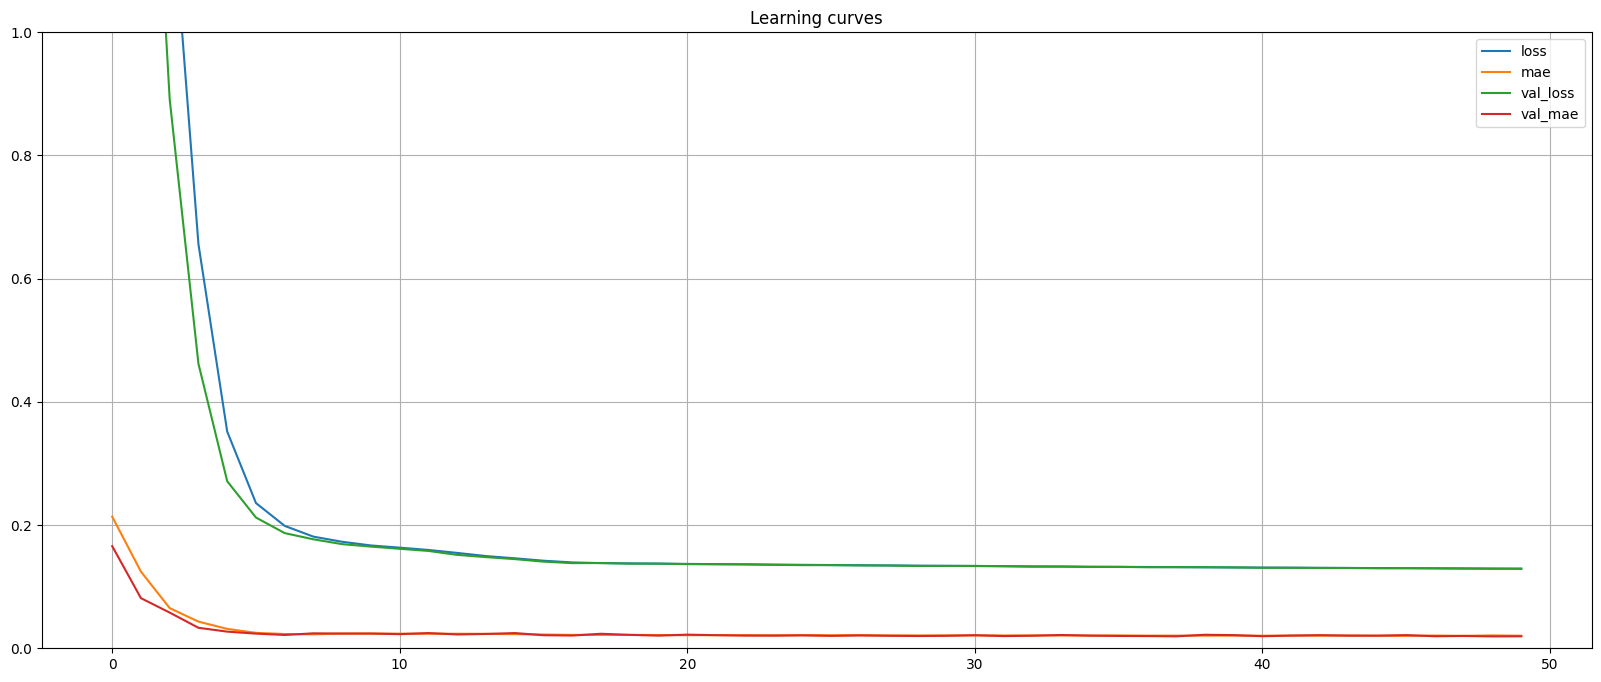

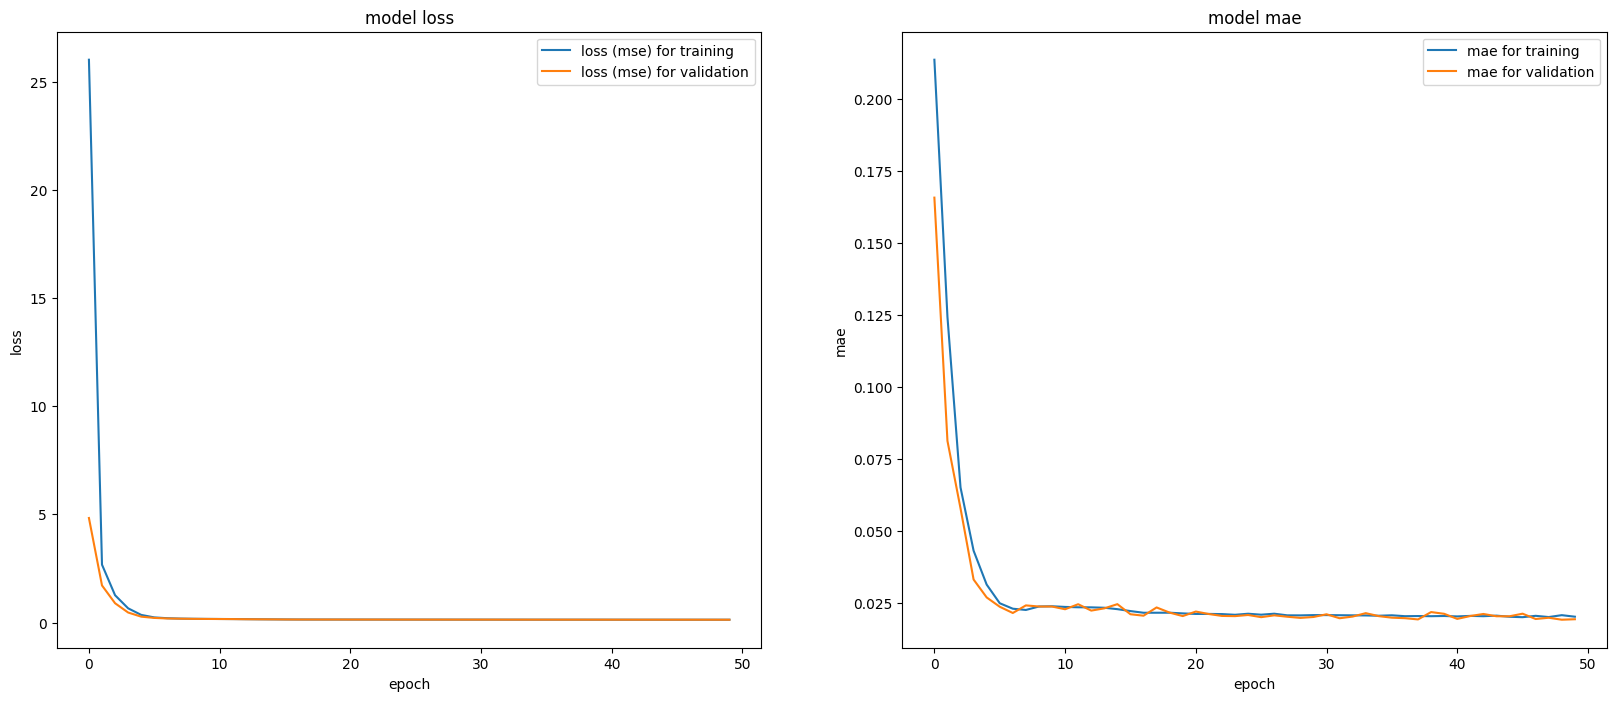

In [26]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers
# + Changing the activation function
# + Changing the optimization function
# + Increasing the number of training epochs
# + Applying an early stopping and saving the best model
# + Applying L1 and L2 regularization

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))

model_1i = Sequential([
    RegularizedDense(128, input_shape=(6,)),
    RegularizedDense(256),
    RegularizedDense(128),
    RegularizedDense(64),
    Dense(1, activation='linear')
])

model_1i.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_1i.summary()

tf.keras.utils.plot_model(model_1i, to_file='model_1i.png')

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model_1i.h5",
                                                   save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                     restore_best_weights=True)

history_1i = model_1i.fit(X_train_norm, y_train,
                          epochs=50,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4,
                          callbacks=[checkpoint_cb, early_stopping_cb])
# Learning curves
learning_curves(history_1i)

# Evaluation model
evaluation_model(history_1i)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,137 (293.50 KB)

 Trainable params: 75,137 (293.50 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/50


225/225 - 3s - 14ms/step - loss: 29.0380 - mae: 0.4556 - val_loss: 6.7001 - val_mae: 0.2638
Epoch 2/50


225/225 - 1s - 6ms/step - loss: 3.6934 - mae: 0.3802 - val_loss: 2.1332 - val_mae: 0.2779
Epoch 3/50


225/225 - 1s - 6ms/step - loss: 1.7495 - mae: 0.3606 - val_loss: 1.2212 - val_mae: 0.2572
Epoch 4/50


225/225 - 1s - 6ms/step - loss: 1.1474 - mae: 0.3531 - val_loss: 0.8052 - val_mae: 0.2388
Epoch 5/50


225/225 - 2s - 7ms/step - loss: 0.8629 - mae: 0.3510 - val_loss: 0.6469 - val_mae: 0.2798
Epoch 6/50


225/225 - 1s - 7ms/step - loss: 0.7286 - mae: 0.3459 - val_loss: 0.5398 - val_mae: 0.2349
Epoch 7/50


225/225 - 1s - 6ms/step - loss: 0.6833 - mae: 0.3452 - val_loss: 0.5313 - val_mae: 0.2705
Epoch 8/50


225/225 - 2s - 11ms/step - loss: 0.6615 - mae: 0.3461 - val_loss: 0.4953 - val_mae: 0.2470
Epoch 9/50


225/225 - 1s - 7ms/step - loss: 0.6375 - mae: 0.3376 - val_loss: 0.4715 - val_mae: 0.2252
Epoch 10/50


225/225 - 2s - 8ms/step - loss: 0.6363 - mae: 0.3432 - val_loss: 0.4708 - val_mae: 0.2307
Epoch 11/50


225/225 - 2s - 8ms/step - loss: 0.6268 - mae: 0.3388 - val_loss: 0.4660 - val_mae: 0.2281
Epoch 12/50


225/225 - 2s - 7ms/step - loss: 0.6226 - mae: 0.3417 - val_loss: 0.4637 - val_mae: 0.2284
Epoch 13/50
225/225 - 1s - 6ms/step - loss: 0.6194 - mae: 0.3369 - val_loss: 0.4741 - val_mae: 0.2487
Epoch 14/50


225/225 - 1s - 5ms/step - loss: 0.6082 - mae: 0.3316 - val_loss: 0.4506 - val_mae: 0.2116
Epoch 15/50
225/225 - 1s - 5ms/step - loss: 0.6081 - mae: 0.3292 - val_loss: 0.4745 - val_mae: 0.2522
Epoch 16/50
225/225 - 1s - 5ms/step - loss: 0.6067 - mae: 0.3271 - val_loss: 0.4540 - val_mae: 0.2202
Epoch 17/50
225/225 - 1s - 5ms/step - loss: 0.6010 - mae: 0.3244 - val_loss: 0.4532 - val_mae: 0.2225


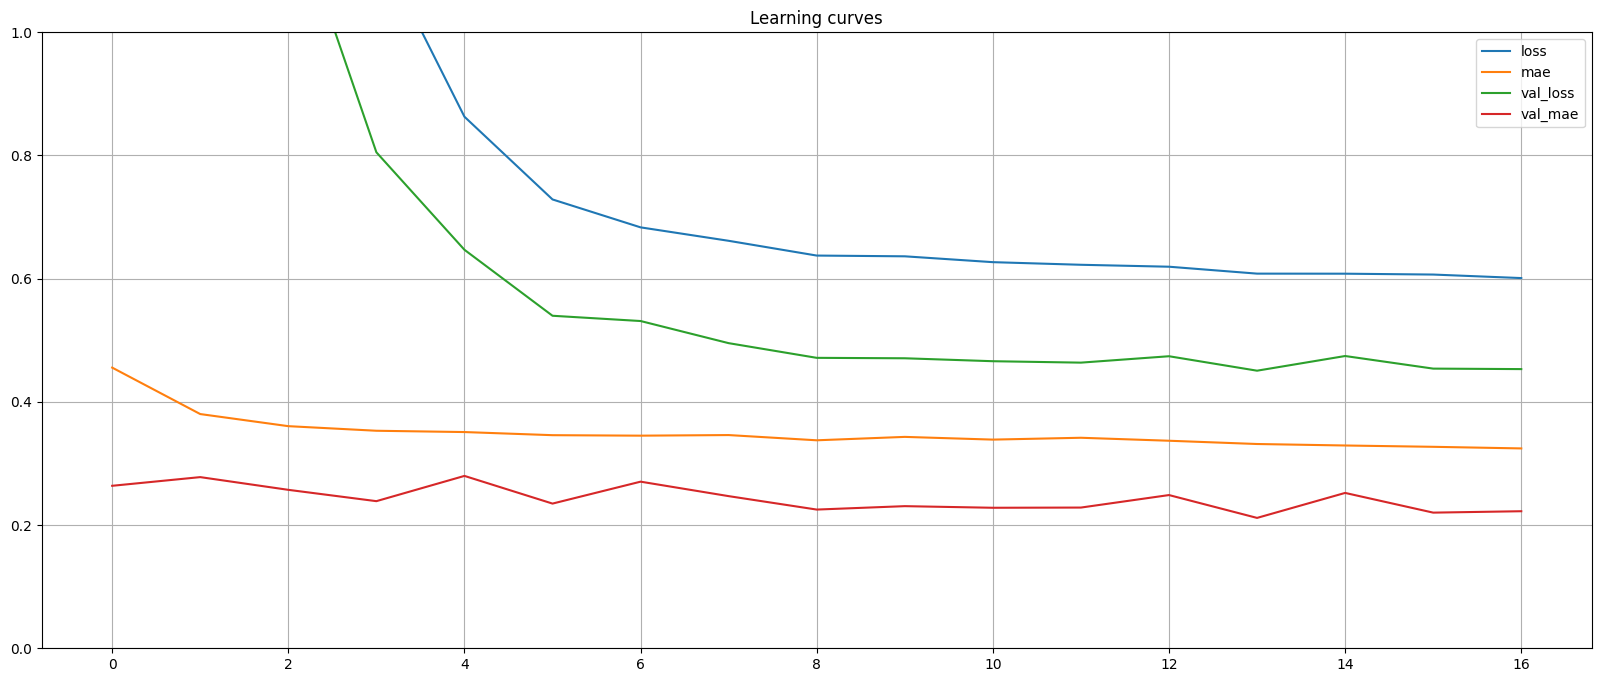

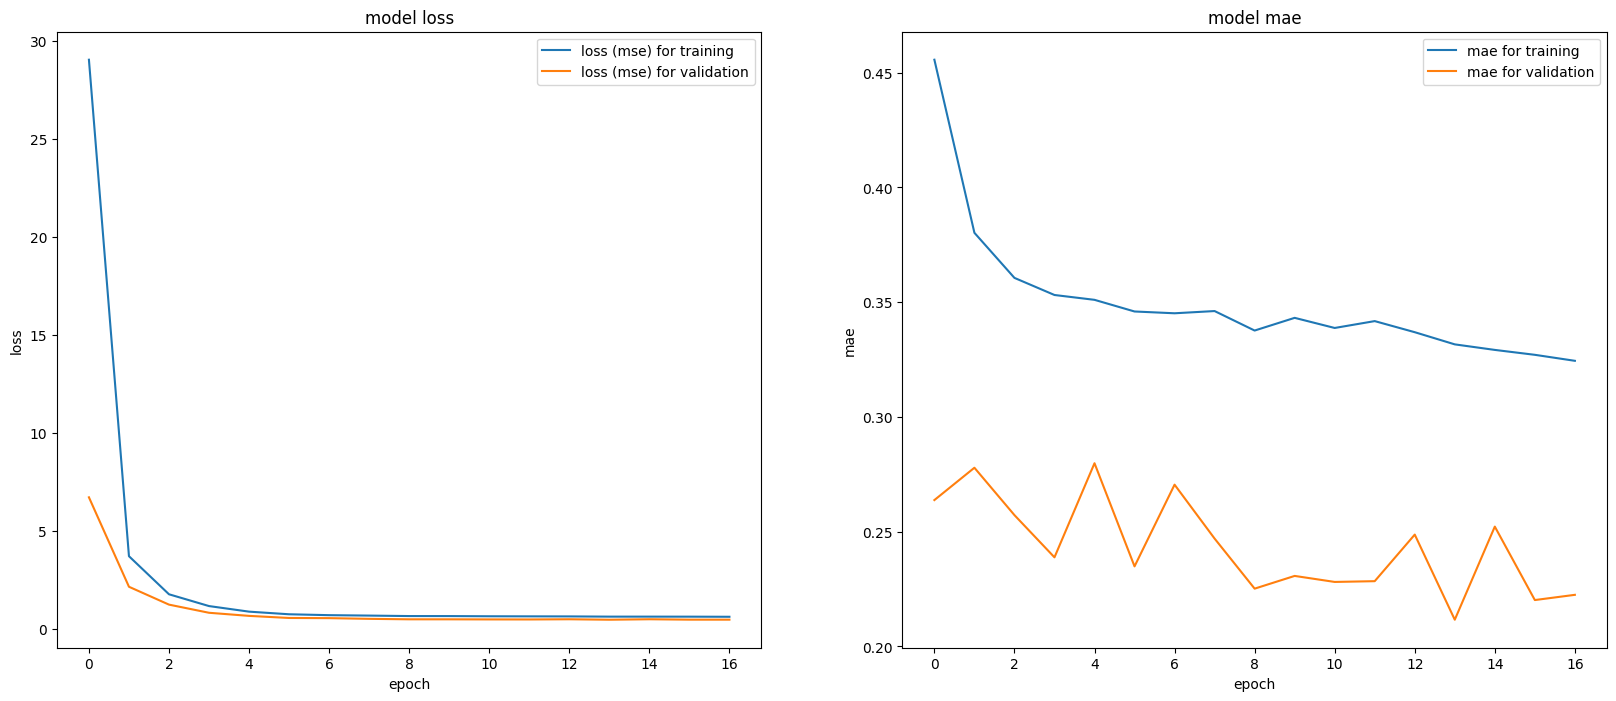

In [27]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers
# + Changing the activation function
# + Changing the optimization function
# + Increasing the number of training epochs
# + Applying an early stopping and saving the best model
# + Applying L1 and L2 regularization
# + Applying Dropout

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))

model_1j = Sequential([
    RegularizedDense(128, input_shape=(6,)),
    Dropout(rate=0.3),
    RegularizedDense(256),
    Dropout(rate=0.3),
    RegularizedDense(128),
    Dropout(rate=0.3),
    RegularizedDense(64),
    Dropout(rate=0.3),
    Dense(1, activation='linear')
])

model_1j.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_1j.summary()

tf.keras.utils.plot_model(model_1j, to_file='model_1j.png')

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model_1j.h5",
                                                   save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                     restore_best_weights=True)

history_1j = model_1j.fit(X_train_norm, y_train,
                          epochs=50,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4,
                          callbacks=[checkpoint_cb, early_stopping_cb])
# Learning curves
learning_curves(history_1j)

# Evaluation model
evaluation_model(history_1j)

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,441 (302.50 KB)

 Trainable params: 76,289 (298.00 KB)

 Non-trainable params: 1,152 (4.50 KB)

You must install pydot (`pip install pydot`) for `plot_model` to work.
Epoch 1/50


225/225 - 5s - 23ms/step - loss: 44.9336 - mae: 0.7430 - val_loss: 23.2042 - val_mae: 0.6479
Epoch 2/50


225/225 - 2s - 7ms/step - loss: 12.6712 - mae: 0.3688 - val_loss: 7.0418 - val_mae: 0.6645
Epoch 3/50


225/225 - 1s - 6ms/step - loss: 4.3483 - mae: 0.2760 - val_loss: 3.4294 - val_mae: 0.5891
Epoch 4/50


225/225 - 1s - 6ms/step - loss: 2.2070 - mae: 0.2385 - val_loss: 2.0489 - val_mae: 0.5721
Epoch 5/50


225/225 - 2s - 7ms/step - loss: 1.2782 - mae: 0.2074 - val_loss: 1.0340 - val_mae: 0.3007
Epoch 6/50


225/225 - 2s - 7ms/step - loss: 0.7974 - mae: 0.1920 - val_loss: 0.6689 - val_mae: 0.2701
Epoch 7/50


225/225 - 2s - 7ms/step - loss: 0.5245 - mae: 0.1871 - val_loss: 0.5876 - val_mae: 0.3773
Epoch 8/50


225/225 - 2s - 7ms/step - loss: 0.3732 - mae: 0.1913 - val_loss: 0.5439 - val_mae: 0.4829
Epoch 9/50


225/225 - 1s - 6ms/step - loss: 0.2898 - mae: 0.1901 - val_loss: 0.4295 - val_mae: 0.4408
Epoch 10/50


225/225 - 2s - 7ms/step - loss: 0.2415 - mae: 0.1881 - val_loss: 0.3102 - val_mae: 0.3056
Epoch 11/50


225/225 - 2s - 7ms/step - loss: 0.2223 - mae: 0.1933 - val_loss: 0.1585 - val_mae: 0.1019
Epoch 12/50
225/225 - 1s - 6ms/step - loss: 0.2116 - mae: 0.1938 - val_loss: 0.1641 - val_mae: 0.1249
Epoch 13/50
225/225 - 1s - 6ms/step - loss: 0.2100 - mae: 0.1920 - val_loss: 0.1719 - val_mae: 0.1367
Epoch 14/50


225/225 - 2s - 7ms/step - loss: 0.2081 - mae: 0.1914 - val_loss: 0.1473 - val_mae: 0.0868
Epoch 15/50
225/225 - 2s - 7ms/step - loss: 0.2142 - mae: 0.1966 - val_loss: 0.1532 - val_mae: 0.1162
Epoch 16/50
225/225 - 2s - 7ms/step - loss: 0.2179 - mae: 0.1965 - val_loss: 0.2151 - val_mae: 0.2464
Epoch 17/50
225/225 - 2s - 7ms/step - loss: 0.2124 - mae: 0.1949 - val_loss: 0.1476 - val_mae: 0.0888


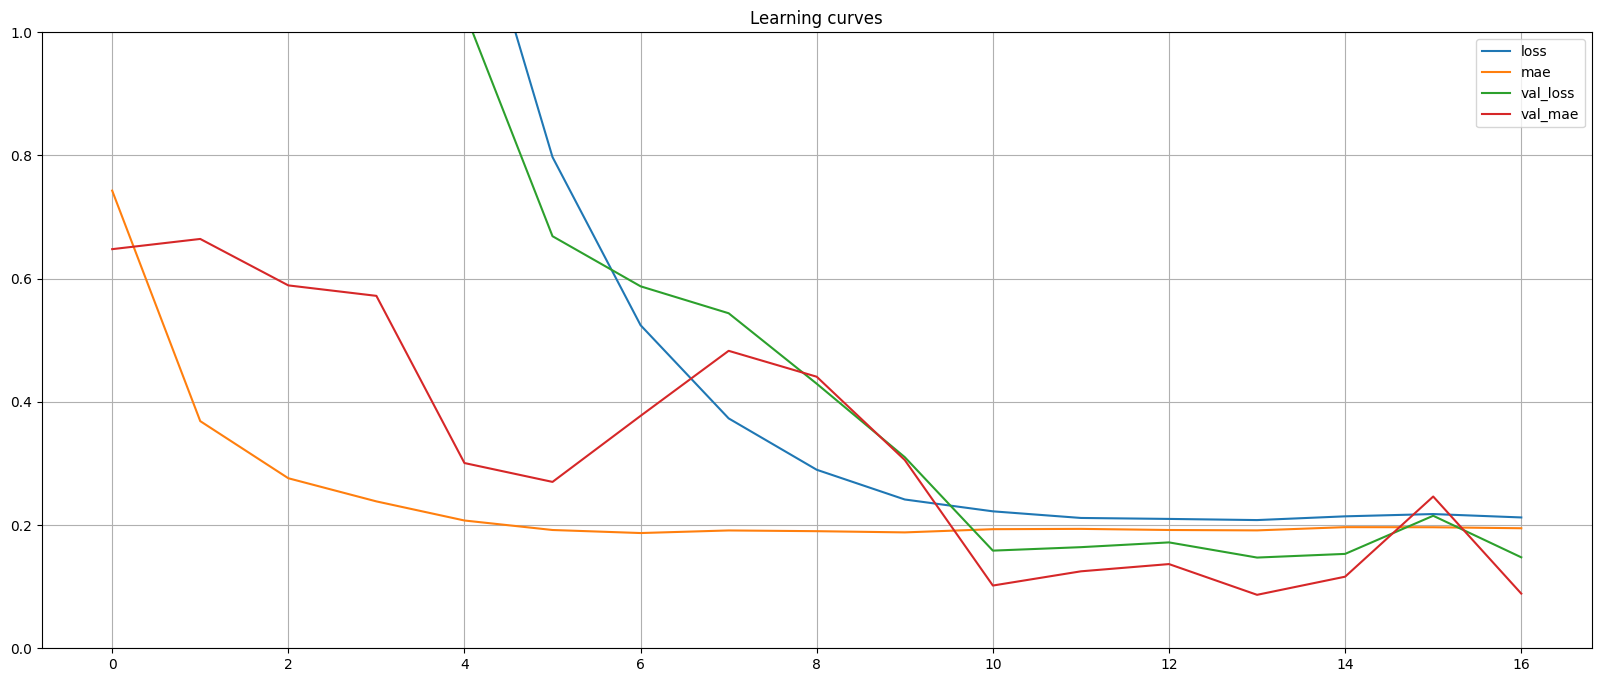

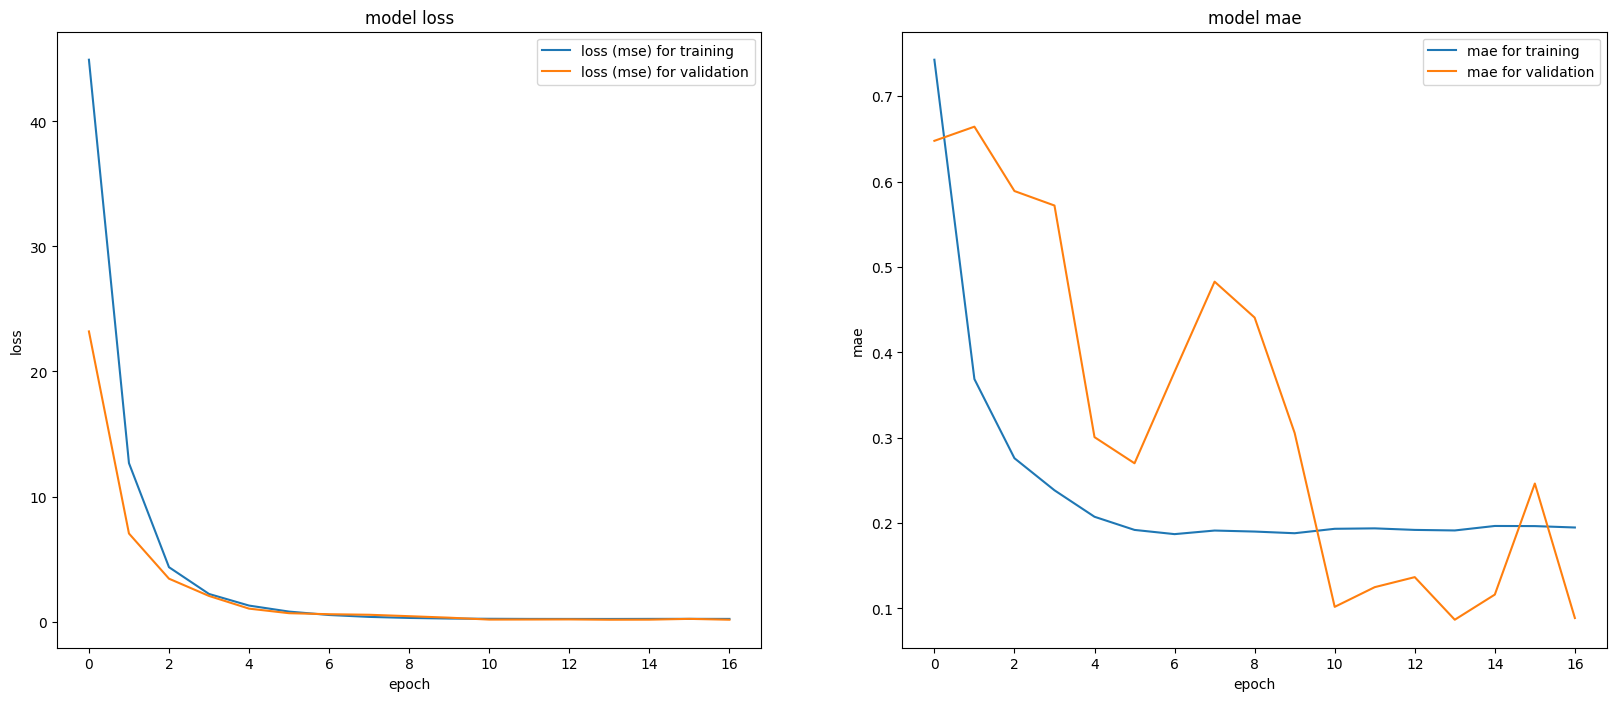

In [28]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers
# + Changing the activation function
# + Changing the optimization function
# + Increasing the number of training epochs
# + Applying an early stopping and saving the best model
# + Applying L1 and L2 regularization
# + Applying Dropout
# + Applying BatchNormalization

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))

model_1k = Sequential([
    RegularizedDense(128, input_shape=(6,)),
    BatchNormalization(),
    Dropout(rate=0.3),

    RegularizedDense(256),
    BatchNormalization(),
    Dropout(rate=0.3),

    RegularizedDense(128),
    BatchNormalization(),
    Dropout(rate=0.3),

    RegularizedDense(64),
    BatchNormalization(),
    Dropout(rate=0.3),

    Dense(1, activation='linear')
])

model_1k.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_1k.summary()

tf.keras.utils.plot_model(model_1k, to_file='model_1k.png')

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model_1k.h5",
                                                   save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                     restore_best_weights=True)

history_1k = model_1k.fit(X_train_norm, y_train,
                          epochs=50,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4,
                          callbacks=[checkpoint_cb, early_stopping_cb])
# Learning curves
learning_curves(history_1k)

# Evaluation model
evaluation_model(history_1k)

In [29]:
# COMPARISON OF MODEL RESULTS

def model_rmse(model):
    # Predictions
    y_preds_train = model.predict(X_train)
    y_preds_test = model.predict(X_test)

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_preds_train))
    # print('Train Score: %.2f RMSE' % (trainScore))

    testScore = math.sqrt(mean_squared_error(y_test, y_preds_test))
    # print('Test Score: %.2f RMSE' % (testScore))
    return trainScore, testScore

641/641 - 1s - 1ms/step - loss: 14.6288 - mae: 3.7557
641/641 - 1s - 1ms/step - loss: 2.0008 - mae: 1.2211
641/641 - 1s - 1ms/step - loss: 0.9064 - mae: 0.7661
641/641 - 1s - 1ms/step - loss: 0.9561 - mae: 0.8103
641/641 - 1s - 1ms/step - loss: 29175.3203 - mae: 169.9146
641/641 - 1s - 1ms/step - loss: 5623.0449 - mae: 72.5780
641/641 - 1s - 1ms/step - loss: 12058.1836 - mae: 106.6454
641/641 - 1s - 1ms/step - loss: 9075.9561 - mae: 93.2679
641/641 - 1s - 1ms/step - loss: 2721.3994 - mae: 43.1636
641/641 - 1s - 1ms/step - loss: 1108.0177 - mae: 25.5133
641/641 - 1s - 1ms/step - loss: 365.1051 - mae: 18.0560
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step
641/641 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step
641/641 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step
641/641 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step
641/641 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step
1495/1495 ━━━━━━━━━━━━━━━━━━━━ 1s

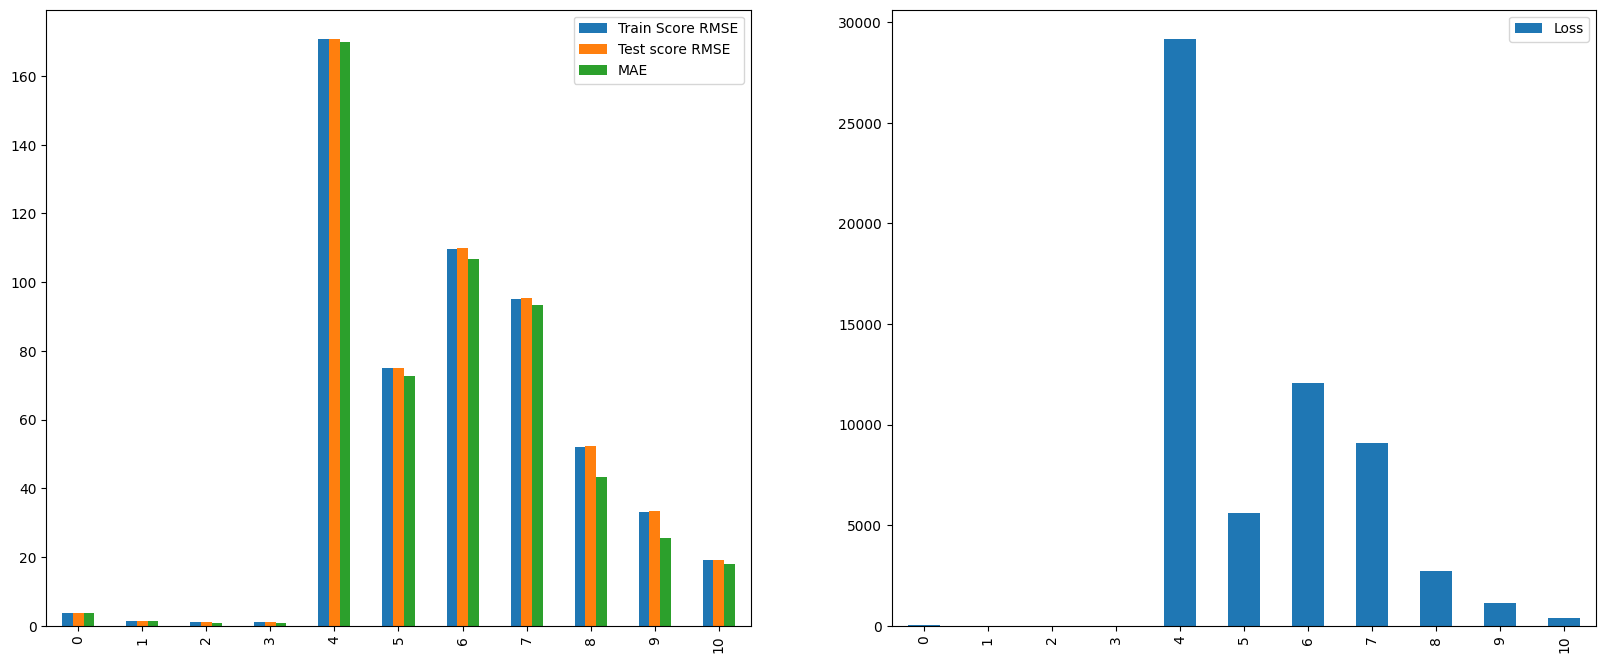

In [30]:
# 0 - Basic model with three fully connected layers
# 1 - Increasing validation_split to 0.4
# 2 - Adding two additional layers
# 3 - Increasing the number of neurons in the hidden layers
# 4 - Changing the activation function
# 5 - Changing the optimization function
# 6 - Increasing the number of training epochs
# 7 - Applying an early stopping and saving the best model
# 8 - Applying L1 and L2 regularization
# 9 - Applying Dropout
# 10 - Applying BatchNormalization


# Evaluate the model on the test set
evaluate_1a = model_1a.evaluate(X_test, y_test, verbose=2)
evaluate_1b = model_1b.evaluate(X_test, y_test, verbose=2)
evaluate_1c = model_1c.evaluate(X_test, y_test, verbose=2)
evaluate_1d = model_1d.evaluate(X_test, y_test, verbose=2)
evaluate_1e = model_1e.evaluate(X_test, y_test, verbose=2)
evaluate_1f = model_1f.evaluate(X_test, y_test, verbose=2)
evaluate_1g = model_1g.evaluate(X_test, y_test, verbose=2)
evaluate_1h = model_1h.evaluate(X_test, y_test, verbose=2)
evaluate_1i = model_1i.evaluate(X_test, y_test, verbose=2)
evaluate_1j = model_1j.evaluate(X_test, y_test, verbose=2)
evaluate_1k = model_1k.evaluate(X_test, y_test, verbose=2)

model_results = [["model_1a", "Basic model with three fully connected layers", model_rmse(model_1a)[0], model_rmse(model_1a)[1], evaluate_1a[0], evaluate_1a[1]],
                 ["model_1b",  "Increasing validation_split to 0.4", model_rmse(model_1b)[0], model_rmse(model_1b)[1], evaluate_1b[0], evaluate_1b[1]],
                 ["model_1c",  "Adding two additional layers", model_rmse(model_1c)[0], model_rmse(model_1c)[1], evaluate_1c[0], evaluate_1c[1]],
                 ["model_1d",  "Increasing the number of neurons in the hidden layers", model_rmse(model_1d)[0], model_rmse(model_1d)[1], evaluate_1d[0], evaluate_1d[1]],
                 ["model_1e",  "Changing the activation function", model_rmse(model_1e)[0], model_rmse(model_1e)[1], evaluate_1e[0], evaluate_1e[1]],
                 ["model_1f",  "Changing the optimization function", model_rmse(model_1f)[0], model_rmse(model_1f)[1], evaluate_1f[0], evaluate_1f[1]],
                 ["model_1g",  "Increasing the number of training epochs", model_rmse(model_1g)[0], model_rmse(model_1g)[1], evaluate_1g[0], evaluate_1g[1]],
                 ["model_1h",  "Applying an early stopping and saving the best model", model_rmse(model_1h)[0], model_rmse(model_1h)[1], evaluate_1h[0], evaluate_1h[1]],
                 ["model_1i",  "Applying L1 and L2 regularization", model_rmse(model_1i)[0], model_rmse(model_1i)[1], evaluate_1i[0], evaluate_1i[1]],
                 ["model_1j",  "Applying Dropout", model_rmse(model_1j)[0], model_rmse(model_1j)[1], evaluate_1j[0], evaluate_1j[1]],
                 ["model_1k",  "Applying BatchNormalization", model_rmse(model_1k)[0], model_rmse(model_1k)[1], evaluate_1k[0], evaluate_1k[1]]]

all_results = pd.DataFrame(model_results, columns=["model", "Improvement", "Train Score RMSE", "Test score RMSE", "Loss", "MAE"])

fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
all_results[["Train Score RMSE", "Test score RMSE", "MAE"]].plot(ax=ax[0], kind='bar')
all_results[["Loss"]].plot(ax=ax[1], kind='bar')
plt.show()